In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA18\TreeBased")

In [3]:
bank=pd.read_excel("bank.xlsx", sheet_name="bank")

In [4]:
bank

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician      NaN  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may    1042.0         1     -1         0  unknown   
1       unknown    5   may    1467.0         1     -1         0  unknown   
2       unknown    5   may    1389.0         1     -1         0  unknown   
3       unknown    5   may     579.0         1     -1         0  unknown   
4       unknown    5   may     673.0         2     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr     257.0         1     -1         0  unknown   
11158   unknown   16   jun      83.0         4     -1         0  unknown   
11159  cellular   19   aug     156.0         2     -1         0  unknown   
11160  cellular    8   may       9.0         2    172         5  failure   
11161  cellular    9   jul     628.0         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11158 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11158 non-null  float64
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


## Univariate Analysis 

In [6]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    plt.figure(figsize=(11,7))
    ax=sns.countplot(data=data, x=x)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    
    plt.show()

In [7]:
bank.dtypes[bank.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
Value count and %
                Count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


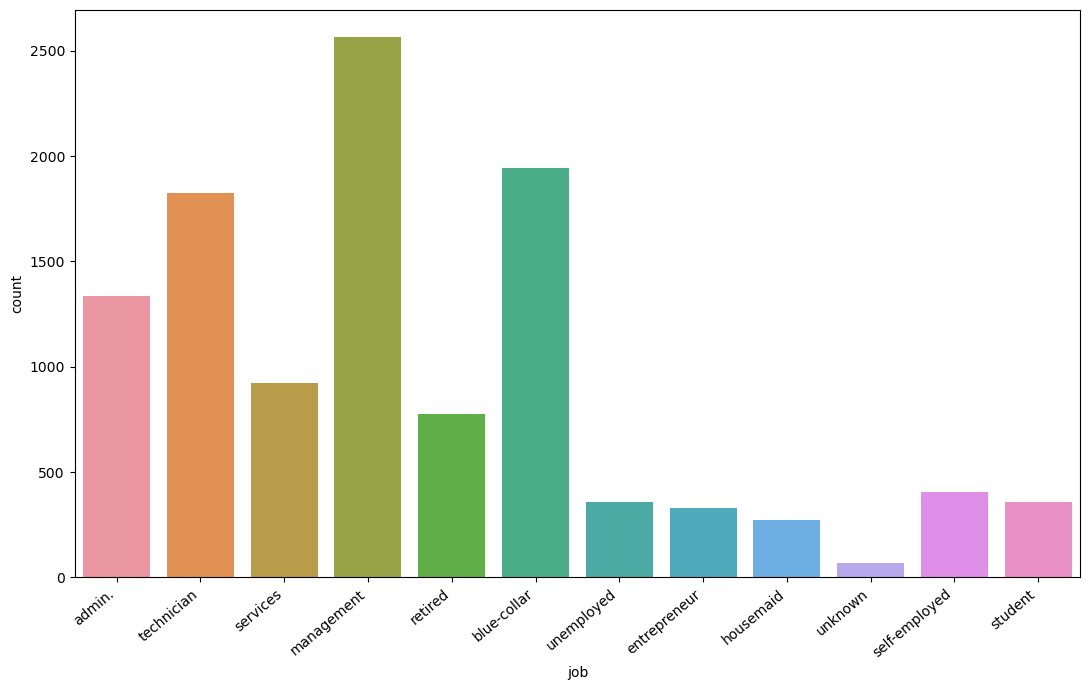

In [8]:
# 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="job") 

In [9]:
bank["job"]=bank["job"].replace(["management", "admin."], "White-collar")

bank["job"]=bank["job"].replace(["services", "housemaid"], "Pink-collar")

bank["job"]=bank["job"].replace(["retired", "student", "unemployed", 
                                   "unknown"], "Others")
bank["job"]=bank["job"].replace(["self-employed", "entrepreneur"], "self-depend")


Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-collar', 'technician', 'Pink-collar', 'Others', 'blue-collar', 'self-depend']
Value count and %
               Count percentage
White-collar   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
Others         1565     14.02%
Pink-collar    1197     10.72%
self-depend     733      6.57%


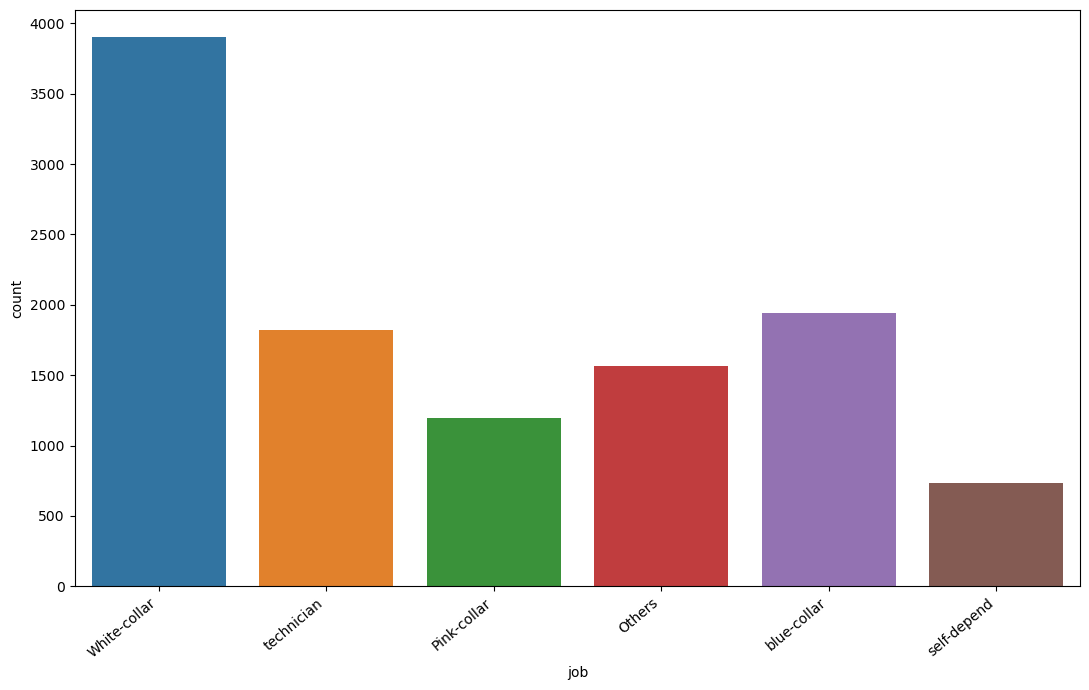

In [10]:
univariate_cat(data=bank, x="job") 

Total missing values : 4

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced', nan]
Value count and %
           Count percentage
married    6349      56.9%
single     3516     31.51%
divorced   1293     11.59%
NaN           4        NaN


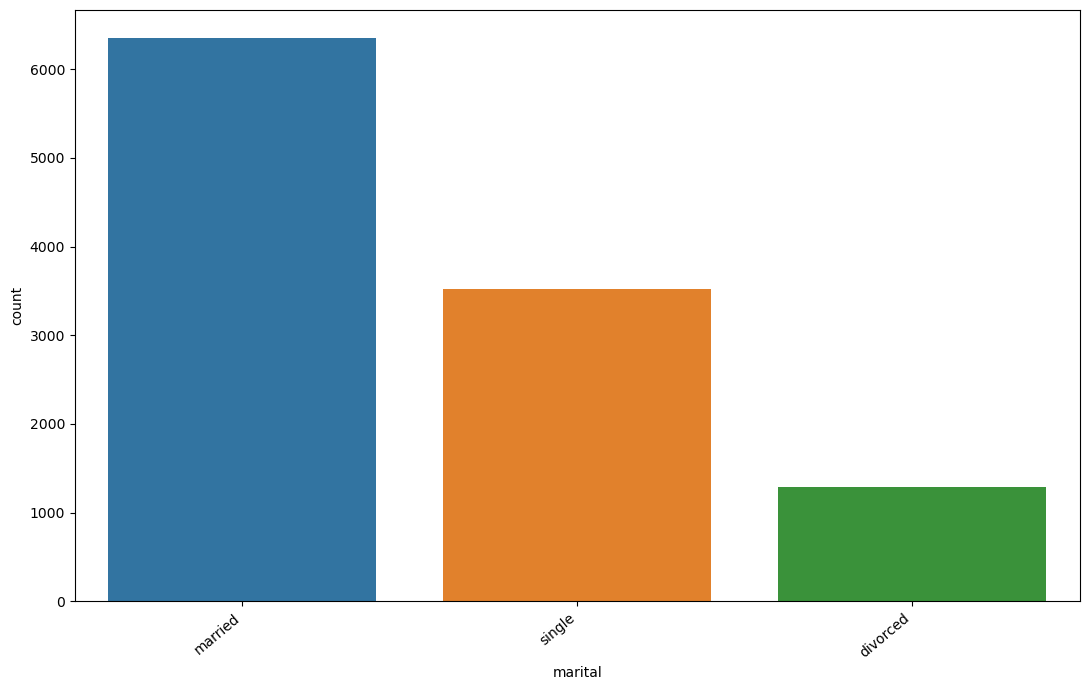

In [11]:
univariate_cat(data=bank, x="marital")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
Value count and %
            Count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


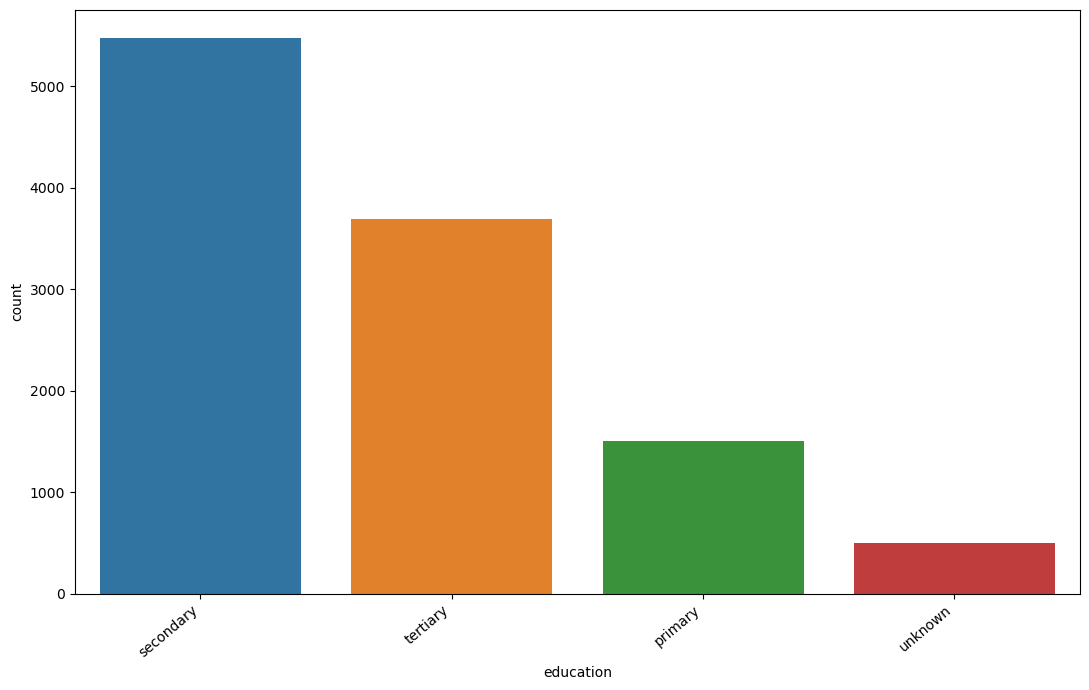

In [12]:
univariate_cat(data=bank, x="education")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no   10994     98.49%
yes    168      1.51%


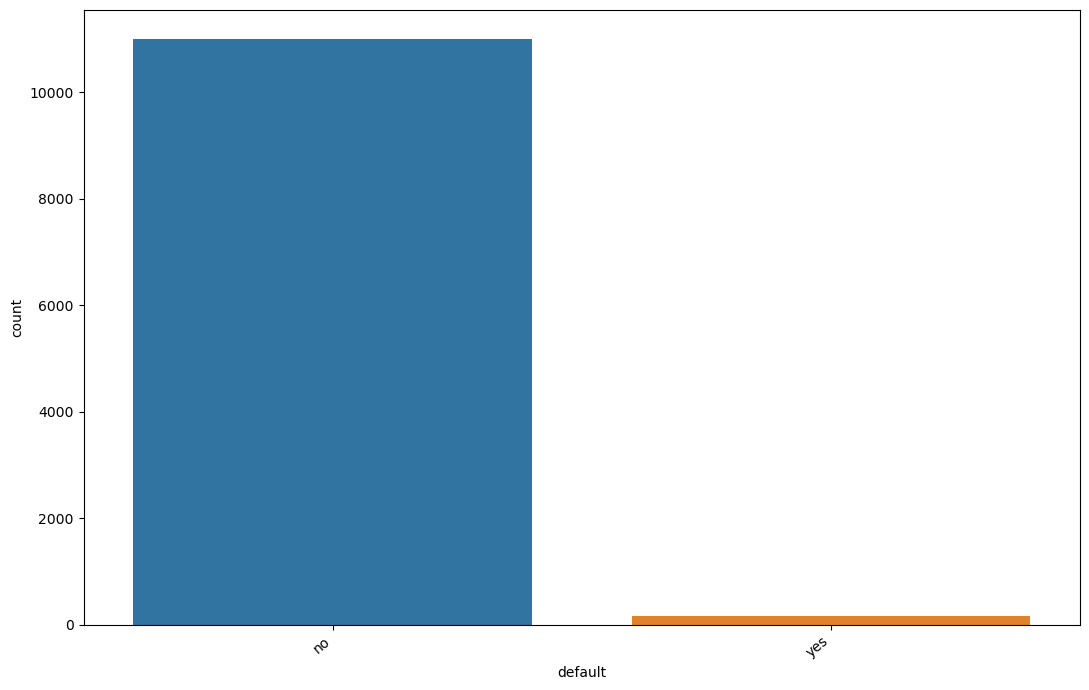

In [13]:
# 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="default") 

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


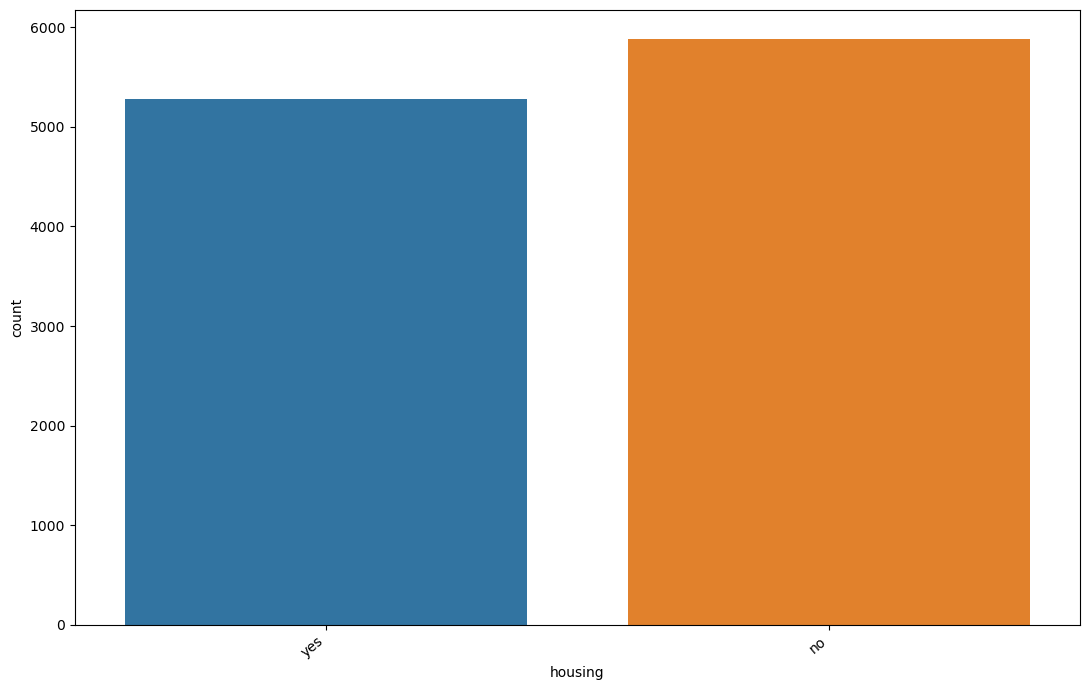

In [14]:
# 'housing', 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


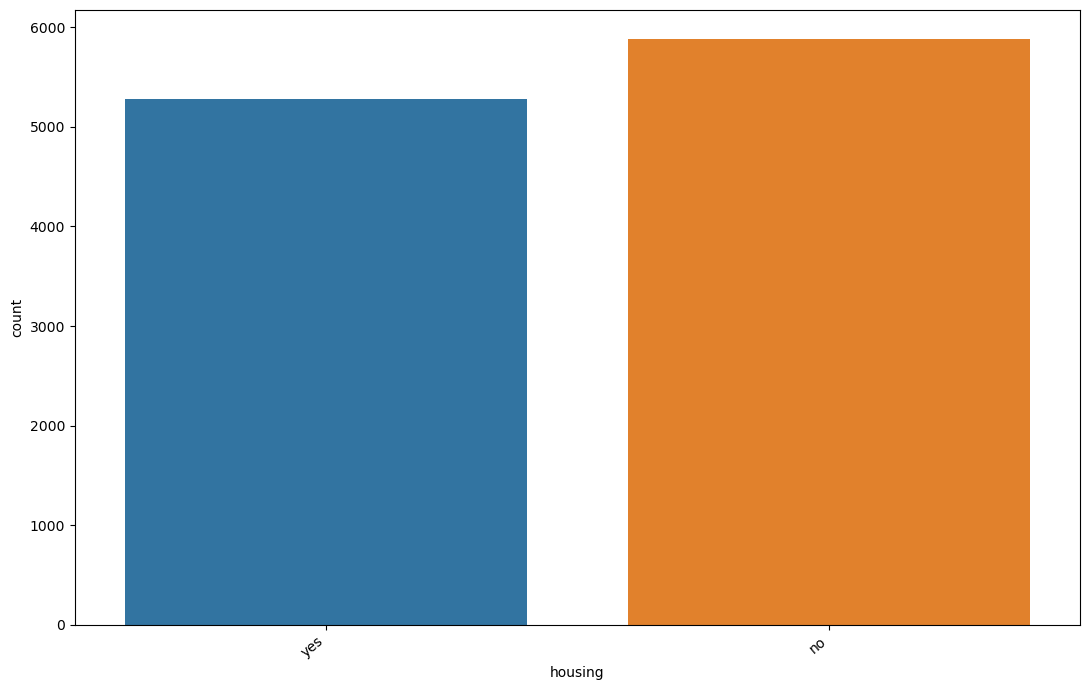

In [15]:
# 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
Value count and %
      Count percentage
no    9702     86.92%
yes   1460     13.08%


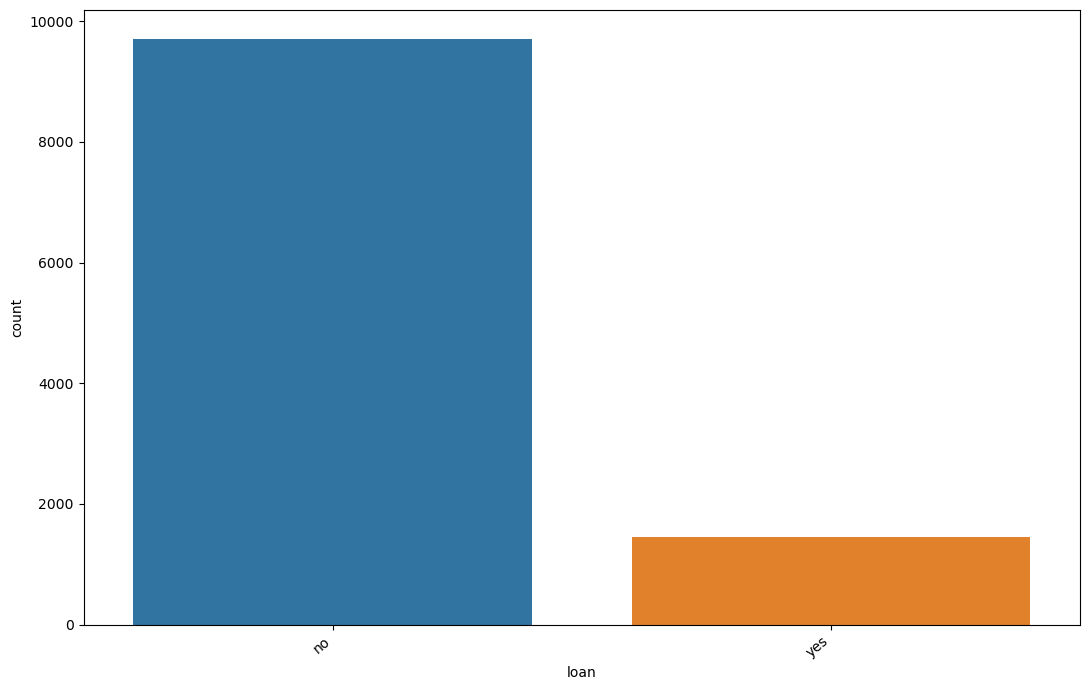

In [16]:
# 'loan', 'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="loan")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
Value count and %
            Count percentage
cellular    8042     72.05%
unknown     2346     21.02%
telephone    774      6.93%


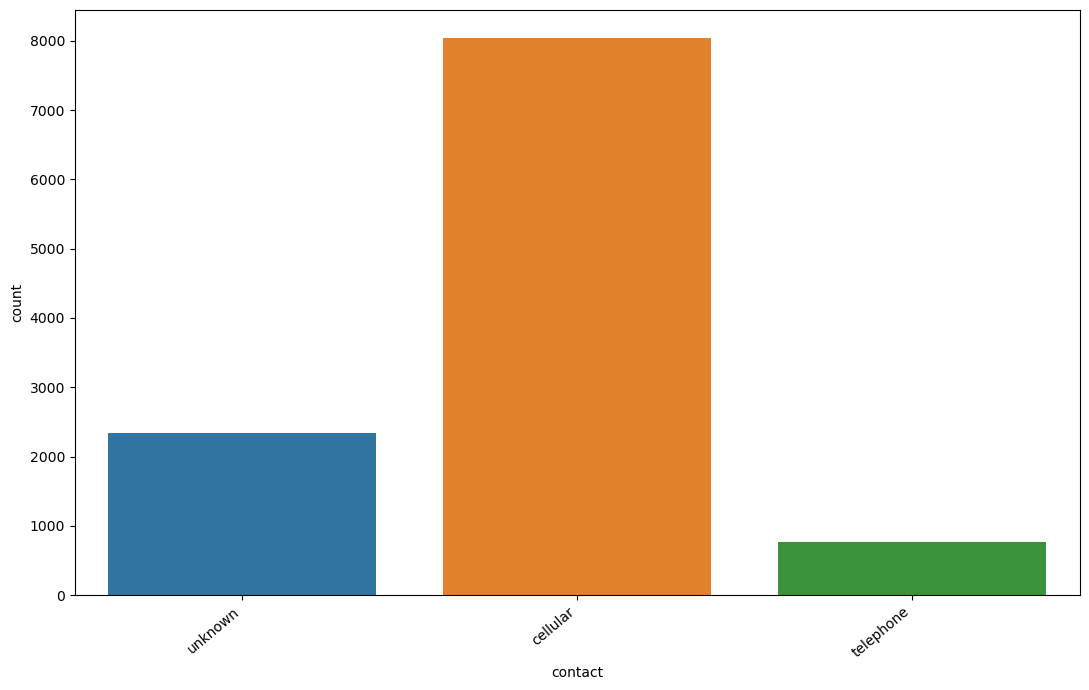

In [17]:
#  'contact','month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="contact")

In [18]:
bank.drop(columns=["contact"], inplace=True) 

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Value count and %
      Count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


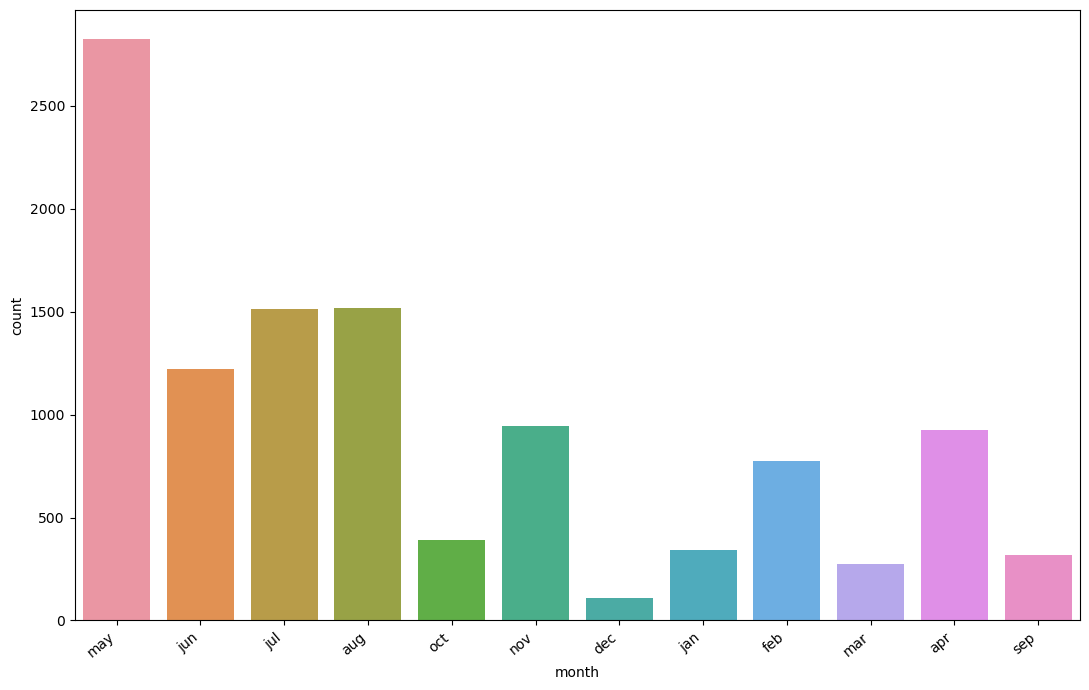

In [19]:
# 'month', 'poutcome', 'deposit'
univariate_cat(data=bank, x="month")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
Value count and %
          Count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


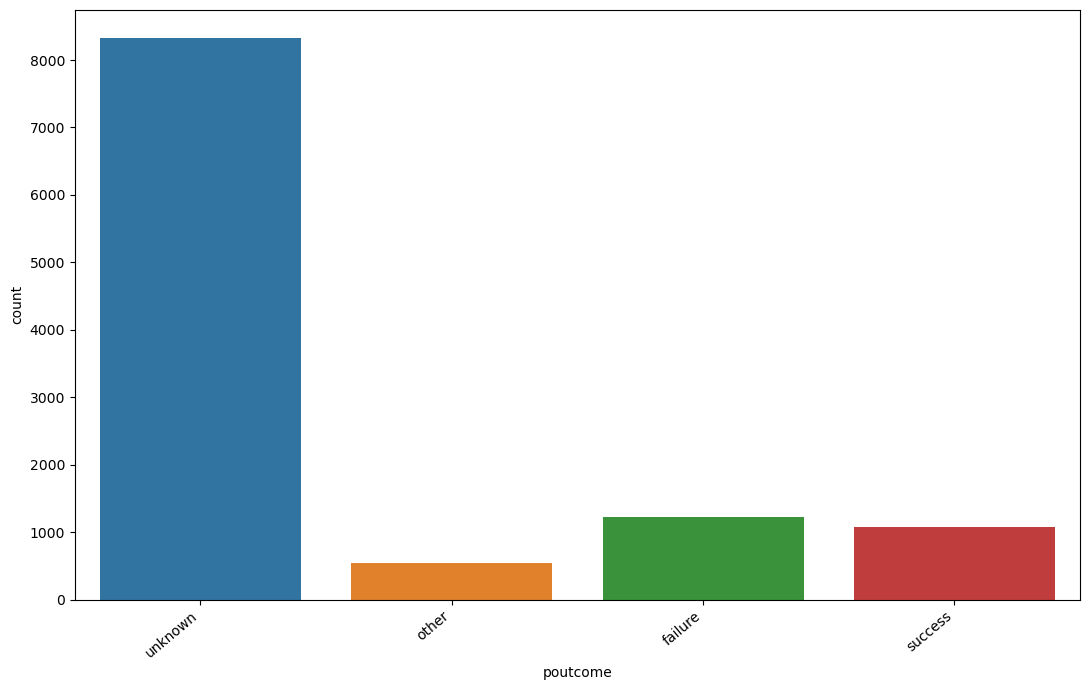

In [20]:
#  'poutcome', 'deposit'
univariate_cat(data=bank, x="poutcome")

In [21]:
bank["poutcome"]=bank["poutcome"].replace(["unknown", "other"], "other")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['other', 'failure', 'success']
Value count and %
          Count percentage
other     8863      79.4%
failure   1228      11.0%
success   1071       9.6%


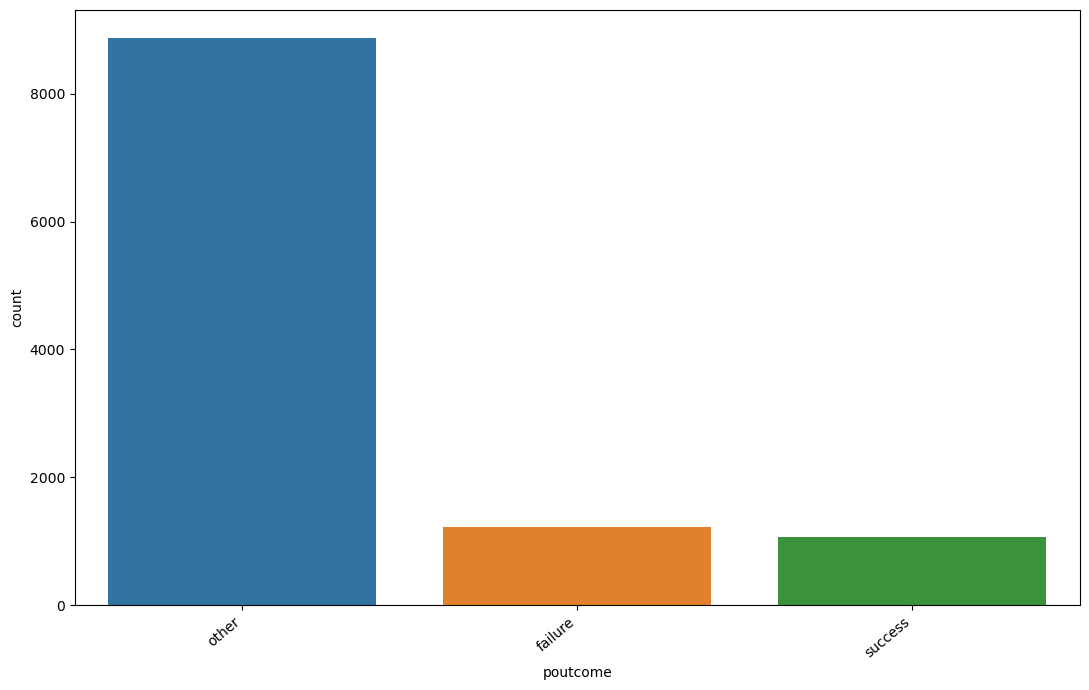

In [22]:
#  'poutcome', 'deposit'
univariate_cat(data=bank, x="poutcome")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
Value count and %
      Count percentage
no    5873     52.62%
yes   5289     47.38%


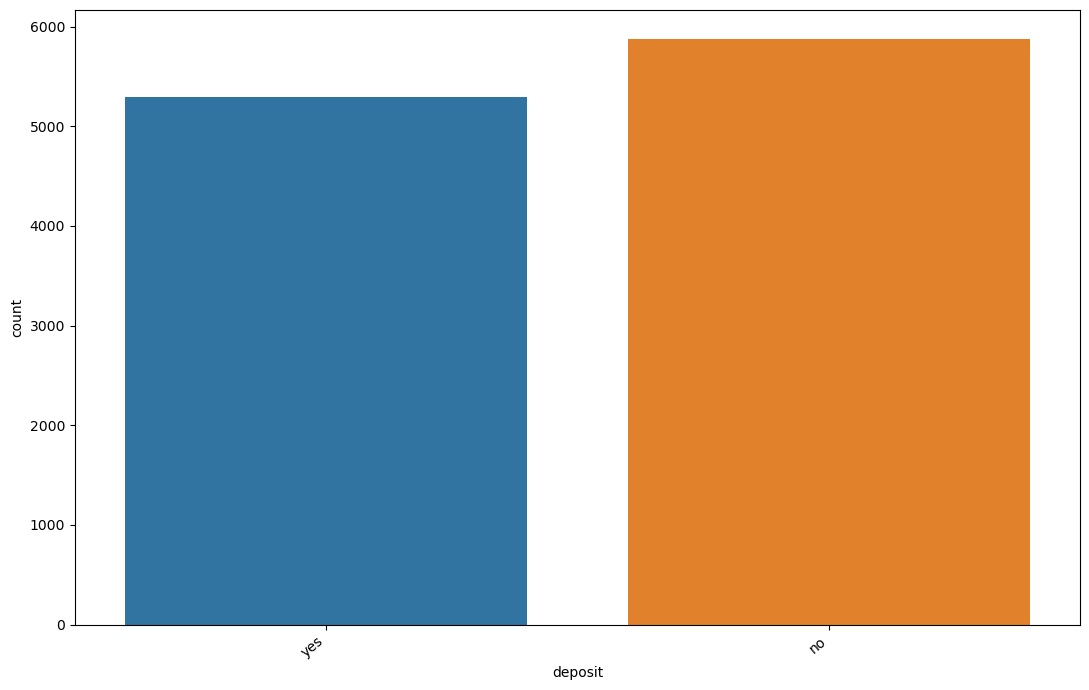

In [23]:
#  'deposit'
univariate_cat(data=bank, x="deposit")

In [24]:
bank["deposit"]=bank["deposit"].map({"yes":1, "no":0})

In [25]:
bank["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

### Univariate analysis  on Numericals

In [26]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [27]:
bank.dtypes[bank.dtypes!="object"].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

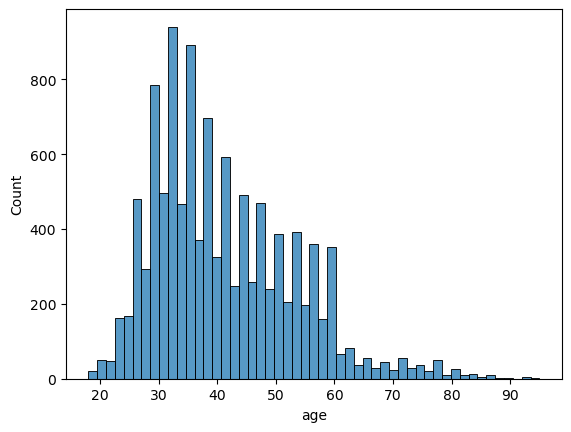

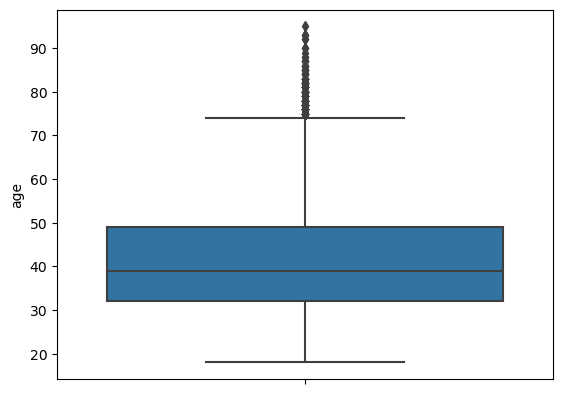

{'missing': 0,
 'min': 18,
 'max': 95,
 'mean': 41.23,
 'var': 141.93,
 'std': 11.91,
 'range': 77,
 'q1': 32.0,
 'q2': 39.0,
 'q3': 49.0,
 'skewness': 0.86,
 'kurtosis': 0.62}

In [28]:
#['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="age")

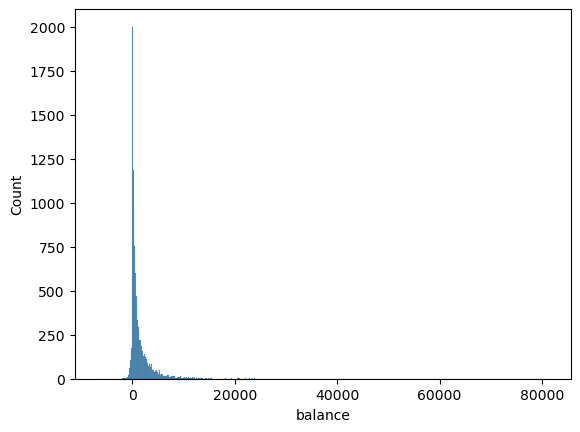

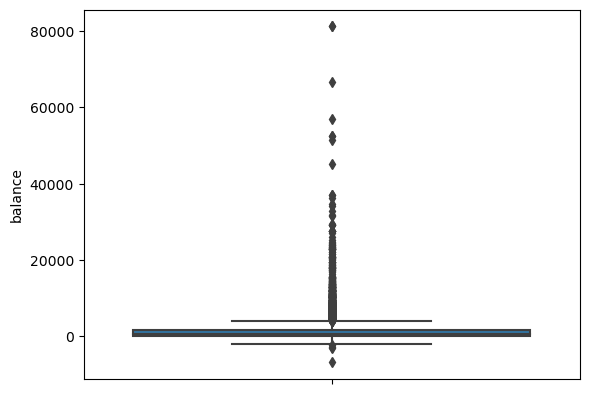

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86}

In [29]:
#['balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="balance")

In [30]:
bank.shape

(11162, 16)

In [31]:
bank[bank["balance"]<=10000].shape

(10934, 16)

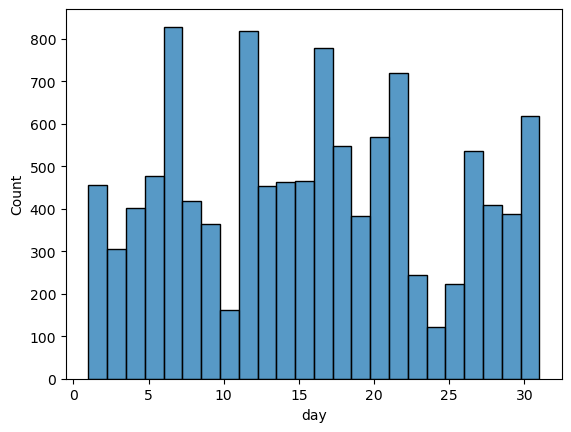

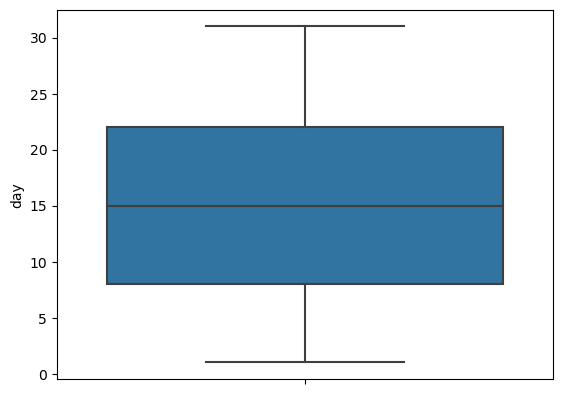

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06}

In [32]:
#[ 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="day")

In [33]:
bank.drop(columns=["day"], inplace=True)

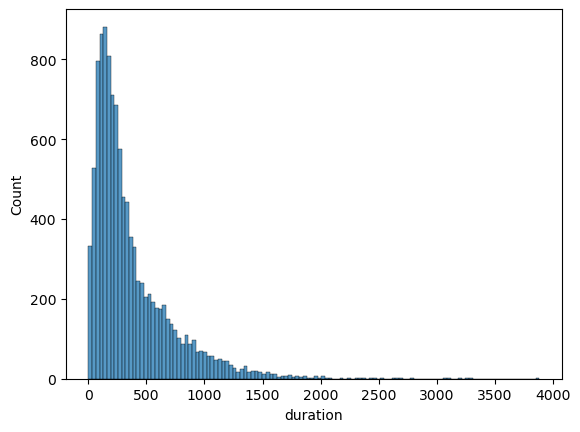

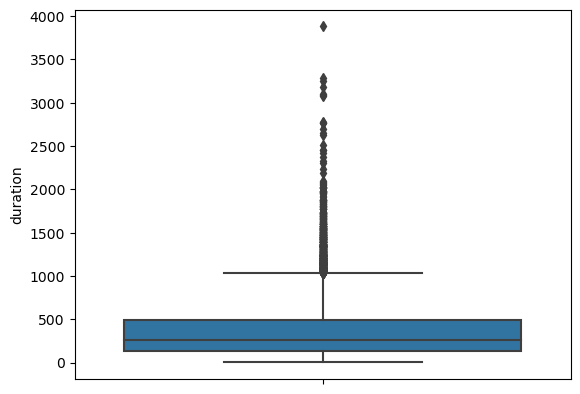

{'missing': 4,
 'min': 2.0,
 'max': 3881.0,
 'mean': 371.74,
 'var': 120321.95,
 'std': 346.87,
 'range': 3879.0,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 495.0,
 'skewness': 2.15,
 'kurtosis': 7.33}

In [34]:
#[ 'duration', 'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="duration")

In [35]:
3500/60

58.333333333333336

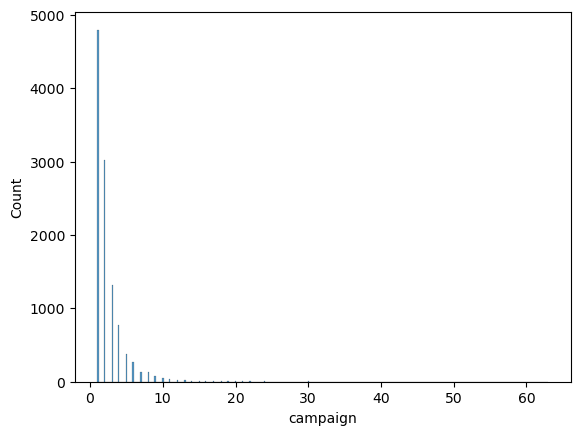

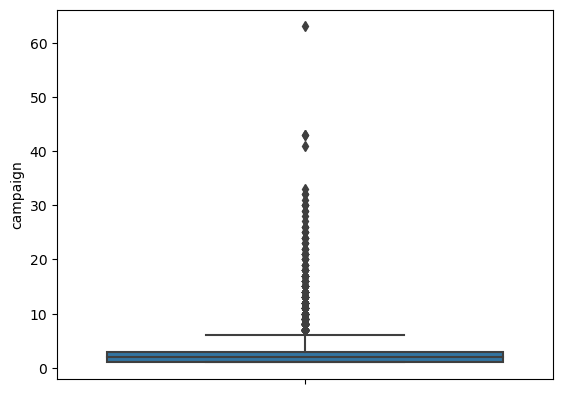

{'missing': 0,
 'min': 1,
 'max': 63,
 'mean': 2.51,
 'var': 7.41,
 'std': 2.72,
 'range': 62,
 'q1': 1.0,
 'q2': 2.0,
 'q3': 3.0,
 'skewness': 5.55,
 'kurtosis': 57.39}

In [36]:
#[  'campaign', 'pdays', 'previous','deposit']
univariate_num(data=bank, x="campaign")

<AxesSubplot:xlabel='campaign', ylabel='count'>

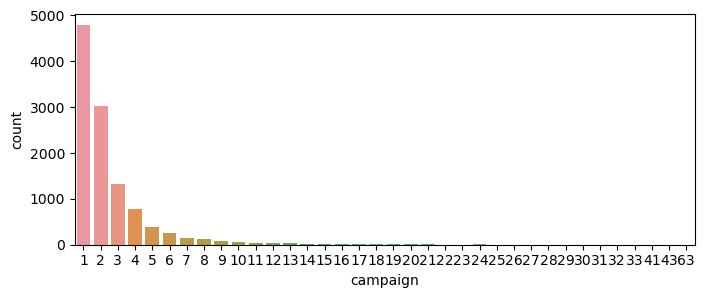

In [37]:
plt.figure(figsize=(8,3))
sns.countplot(data=bank, x="campaign")

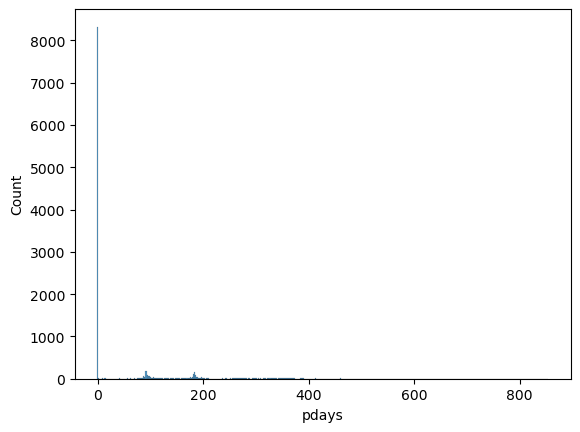

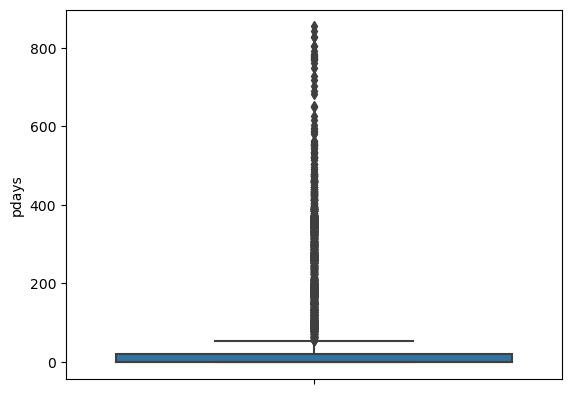

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84}

In [38]:
#[   'pdays', 'previous','deposit']
univariate_num(data=bank, x="pdays")

<AxesSubplot:xlabel='pdays', ylabel='count'>

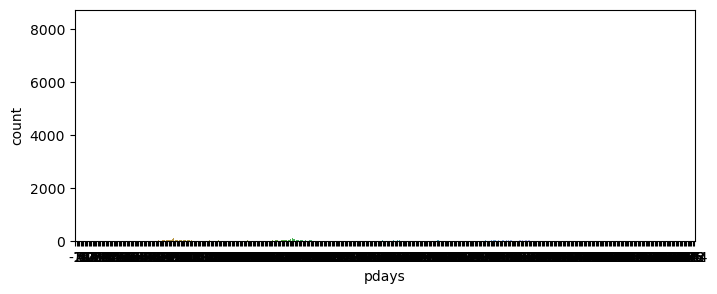

In [39]:
plt.figure(figsize=(8,3))
sns.countplot(data=bank, x="pdays")

In [40]:
bank["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [41]:
bank.loc[bank["pdays"]==-1,"pdays"]=999
bank["recent_pdays"]=1/bank["pdays"]
bank.drop(columns=["pdays"], inplace=True) 

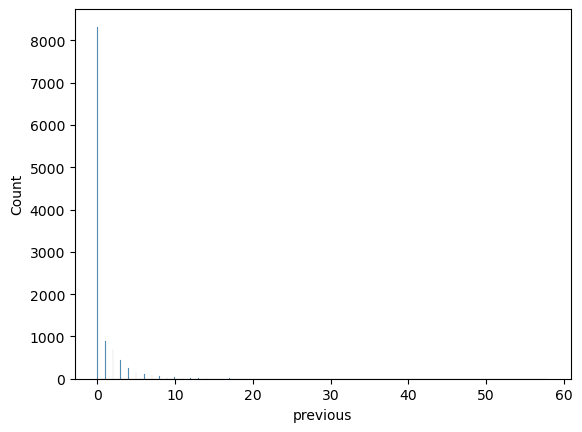

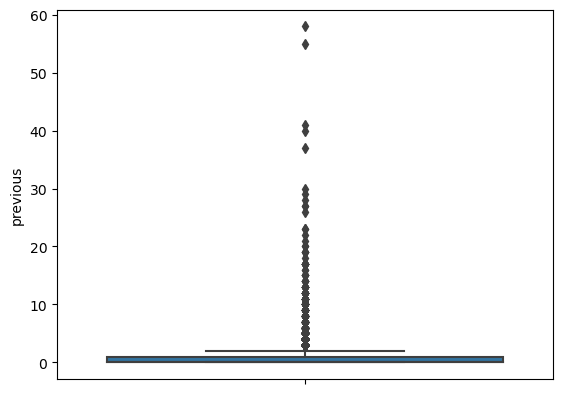

{'missing': 0,
 'min': 0,
 'max': 58,
 'mean': 0.83,
 'var': 5.25,
 'std': 2.29,
 'range': 58,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 7.34,
 'kurtosis': 106.2}

In [42]:
#[  'previous','deposit']
univariate_num(data=bank, x="previous")

## Bivariate Analysis 

In [43]:
# cat-cat 
# cat-num
# num-num

In [44]:
pd.crosstab(bank["job"], bank["deposit"])

deposit          0     1
job                     
Others         544  1021
Pink-collar    719   478
White-collar  1968  1932
blue-collar   1236   708
self-depend    423   310
technician     983   840

In [45]:
pd.crosstab(bank["job"], bank["deposit"], normalize="index")

deposit              0         1
job                             
Others        0.347604  0.652396
Pink-collar   0.600668  0.399332
White-collar  0.504615  0.495385
blue-collar   0.635802  0.364198
self-depend   0.577080  0.422920
technician    0.539221  0.460779

In [46]:
pd.crosstab(bank["job"], bank["deposit"], normalize="columns")

deposit              0         1
job                             
Others        0.092627  0.193042
Pink-collar   0.122425  0.090376
White-collar  0.335093  0.365286
blue-collar   0.210455  0.133863
self-depend   0.072025  0.058612
technician    0.167376  0.158820

In [47]:
bank.dtypes[bank.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome'],
      dtype='object')

In [48]:
#'marital', 'education', 'default', 'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["marital"], bank["deposit"], normalize="index")

deposit          0         1
marital                     
divorced  0.518948  0.481052
married   0.566073  0.433927
single    0.456200  0.543800

In [49]:
#'education', 'default', 'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["education"], bank["deposit"], normalize="index")

deposit           0         1
education                    
primary    0.606000  0.394000
secondary  0.552593  0.447407
tertiary   0.458932  0.541068
unknown    0.492958  0.507042

In [50]:
#'default', 'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["default"], bank["deposit"], normalize="index")

deposit         0         1
default                    
no       0.523649  0.476351
yes      0.690476  0.309524

In [51]:
#'housing', 'loan', 'month','poutcome'
pd.crosstab(bank["housing"], bank["deposit"], normalize="index")

deposit         0         1
housing                    
no       0.429689  0.570311
yes      0.633592  0.366408

In [52]:
#'loan', 'month','poutcome'
pd.crosstab(bank["loan"], bank["deposit"], normalize="index")

deposit         0         1
loan                       
no       0.504741  0.495259
yes      0.668493  0.331507

In [53]:
#'month','poutcome'
pd.crosstab(bank["month"], bank["deposit"])

deposit     0    1
month             
apr       346  577
aug       831  688
dec        10  100
feb       335  441
jan       202  142
jul       887  627
jun       676  546
mar        28  248
may      1899  925
nov       540  403
oct        69  323
sep        50  269

In [54]:
pd.crosstab(bank["month"], bank["deposit"], normalize="index")

deposit         0         1
month                      
apr      0.374865  0.625135
aug      0.547070  0.452930
dec      0.090909  0.909091
feb      0.431701  0.568299
jan      0.587209  0.412791
jul      0.585865  0.414135
jun      0.553191  0.446809
mar      0.101449  0.898551
may      0.672450  0.327550
nov      0.572641  0.427359
oct      0.176020  0.823980
sep      0.156740  0.843260

In [55]:
pd.crosstab(bank['poutcome'], bank["deposit"])

deposit      0     1
poutcome            
failure    610   618
other     5170  3693
success     93   978

In [56]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

### Cat-Num

In [57]:
bank.groupby(["deposit"]).agg({"age":["min", "mean", "median","max", "std", "count"]})

age                                       
        min       mean median max        std count
deposit                                           
0        18  40.837391   39.0  89  10.264815  5873
1        18  41.670070   38.0  95  13.497781  5289

<AxesSubplot:xlabel='deposit'>

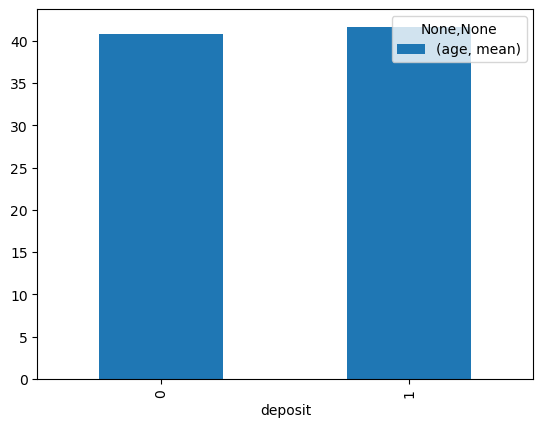

In [58]:
bank.groupby(["deposit"]).agg({"age":["mean"]}).plot(kind="bar")

In [59]:
bank.groupby(["deposit"]).agg({"balance":["min", "mean", "median","max", "std", "count"]})

balance                                              
            min         mean median    max          std count
deposit                                                      
0         -6847  1280.227141  414.0  66653  2933.411934  5873
1         -3058  1804.267915  733.0  81204  3501.104777  5289

In [60]:

bank.groupby(["deposit"]).agg({"duration":["min", "mean", "median","max", "std", "count"]})

duration                                             
             min        mean median     max         std count
deposit                                                      
0            2.0  223.130257  163.0  3284.0  208.577530  5873
1            8.0  536.893661  426.0  3881.0  392.278918  5285

## Num - Num

<AxesSubplot:xlabel='age', ylabel='balance'>

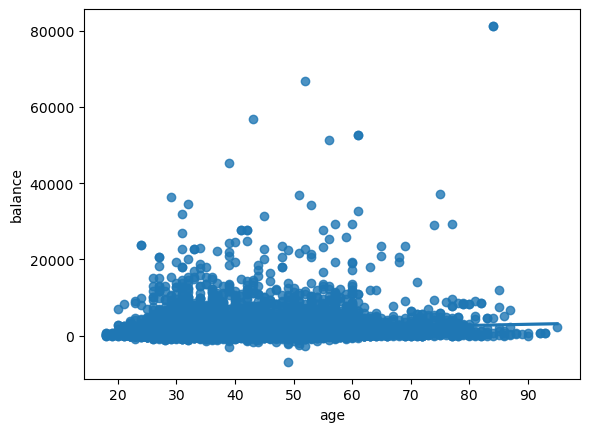

In [61]:
sns.regplot(data=bank, x="age", y="balance") 

In [62]:
bank[["age", "balance"]].corr()

age  balance
age      1.0000   0.1123
balance  0.1123   1.0000

<AxesSubplot:xlabel='age', ylabel='duration'>

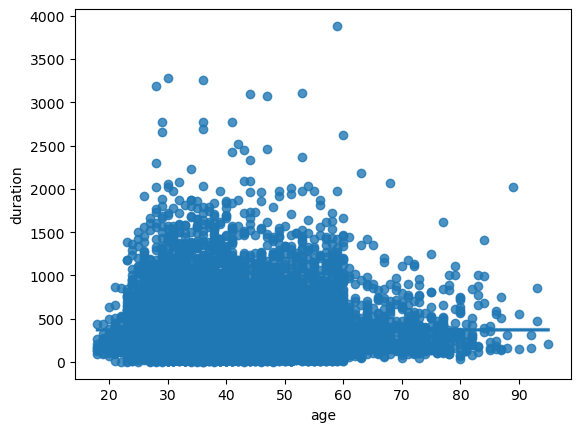

In [63]:
sns.regplot(data=bank, x="age", y="duration")

<AxesSubplot:xlabel='balance', ylabel='duration'>

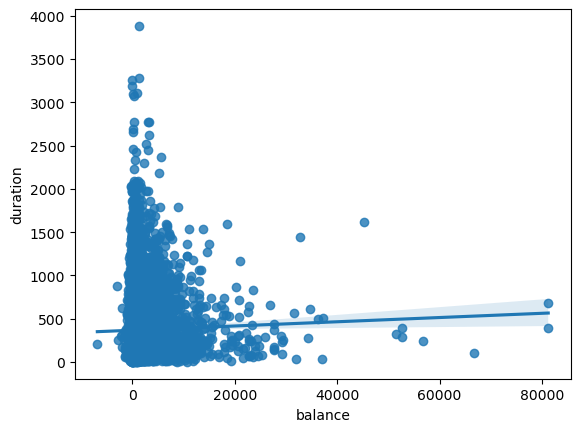

In [64]:
sns.regplot(data=bank, x="balance", y="duration")

## Missing Value Treatment

In [88]:
bank.dropna(inplace=True)

In [89]:
bank.isnull().sum() 

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
month           0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

***
* There is no missing value 
***

### Outlier Treatment

<AxesSubplot:ylabel='age'>

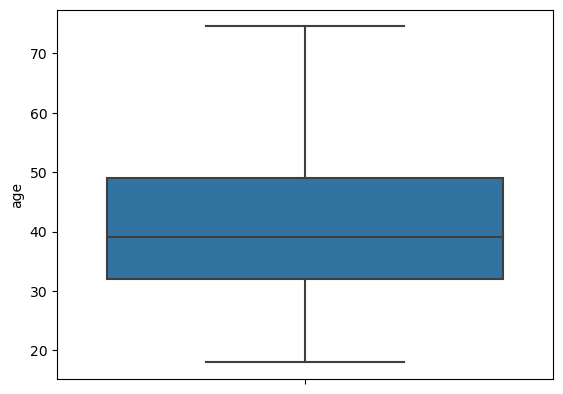

In [90]:
sns.boxplot(data=bank, y="age")

### Tukey method to treat outliers

In [91]:
# # outliers exit outside these boundaries
# lower_side_boundary = Q1-1.5*(Q3-Q1)
# upper_side_boundary=Q3+1.5*(Q3-Q1)

# where Q1 = 25the percentile
# Q3= 75th percentile

# Q3-Q1 is interquartile range (IQR)

# if any value is less than lower_side_boundary then it has outliers
# If any value is higher than upper_side_boundary then it is outliers



In [68]:
q1=bank["age"].quantile(.25)
q3=bank["age"].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

lower_cap

6.5

In [69]:
upper_cap

74.5

In [70]:
bank["age"].max()

95

In [71]:
q1=bank["age"].quantile(.25)
q3=bank["age"].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank["age"]=np.where(bank["age"]>=upper_cap, upper_cap,bank["age"] )
bank["age"]=np.where(bank["age"]<=lower_cap, lower_cap, bank["age"])


<AxesSubplot:ylabel='age'>

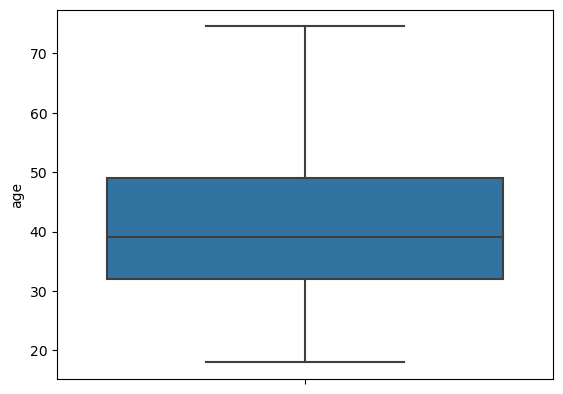

In [72]:
sns.boxplot(data=bank, y="age")

In [73]:
bank["balance"]=np.where(bank["balance"]<=0, 0, bank["balance"])

<AxesSubplot:ylabel='balance'>

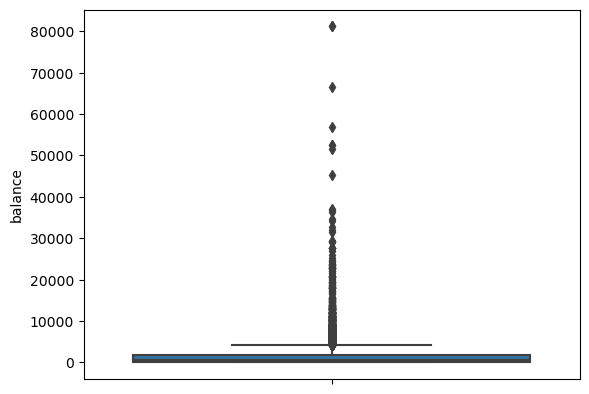

In [74]:
sns.boxplot(data=bank, y="balance")

In [75]:
var="balance"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap, upper_cap,bank[var] )
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])


<AxesSubplot:ylabel='balance'>

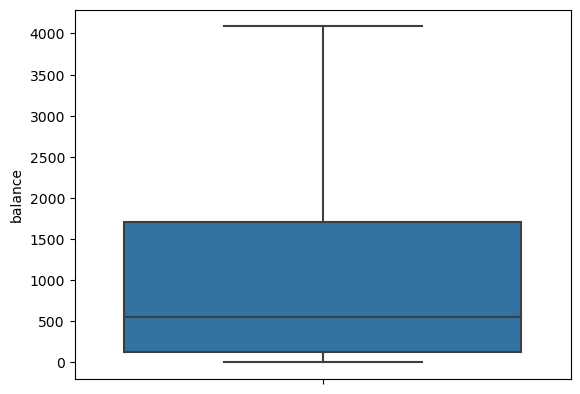

In [76]:
sns.boxplot(data=bank, y="balance")

<AxesSubplot:ylabel='duration'>

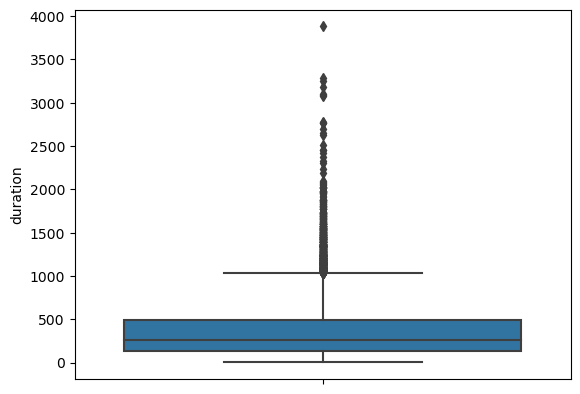

In [77]:
sns.boxplot(data=bank, y="duration")

In [78]:
var="duration"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap, upper_cap,bank[var] )
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])

<AxesSubplot:ylabel='duration'>

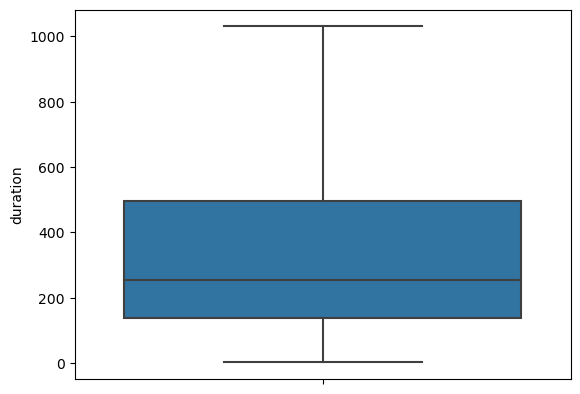

In [79]:
sns.boxplot(data=bank, y="duration")

In [80]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

<AxesSubplot:ylabel='recent_pdays'>

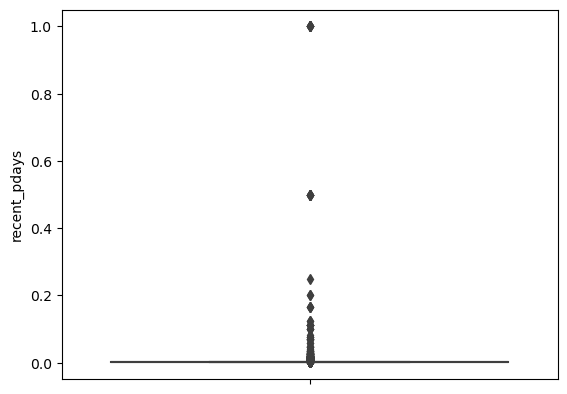

In [81]:
sns.boxplot(data=bank, y="recent_pdays")

In [82]:
var="recent_pdays"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
bank[var]=np.where(bank[var]>=upper_cap, upper_cap,bank[var] )
bank[var]=np.where(bank[var]<=lower_cap, lower_cap, bank[var])

<AxesSubplot:ylabel='recent_pdays'>

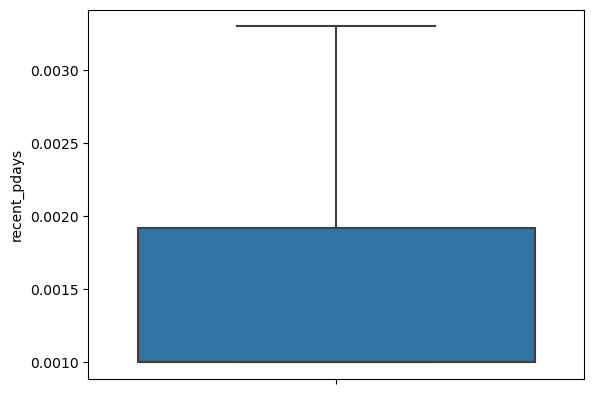

In [83]:
sns.boxplot(data=bank, y="recent_pdays")

### dummies

In [99]:
bank1=pd.get_dummies(data=bank, drop_first=True) 

In [100]:
bank1.head(4)

age  balance  duration  campaign  previous  deposit  recent_pdays  \
0  59.0   2343.0    1030.5         1         0        1      0.001001   
1  56.0     45.0    1030.5         1         0        1      0.001001   
2  41.0   1270.0    1030.5         1         0        1      0.001001   
3  55.0   2476.0     579.0         1         0        1      0.001001   

   job_Pink-collar  job_White-collar  job_blue-collar  ...  month_jan  \
0                0                 1                0  ...          0   
1                0                 1                0  ...          0   
2                0                 0                0  ...          0   
3                1                 0                0  ...          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0          0          0          0          1          0          0   
1          0          0          0          1          0          0   
2          0          0          0          1          0          0   
3          0          0          0          1          0          0   

   month_sep  poutcome_other  poutcome_success  
0          0               1                 0  
1          0               1                 0  
2          0               1                 0  
3          0               1                 0  

[4 rows x 33 columns]

In [97]:
bank.shape

(11154, 15)

In [98]:
bank1.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
previous               0
deposit                0
recent_pdays           0
job_Pink-collar        0
job_White-collar       0
job_blue-collar        0
job_self-depend        0
job_technician         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
dtype: int64

In [87]:
bank1.to_csv(r"D:\Training\Imarticus\PGA\PGA25\ML\Ensemble\bank_cleaned.csv") 

## Model development

In [101]:
x=bank1.drop(columns=["deposit"])
y=bank1["deposit"]

In [102]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [103]:
from sklearn.linear_model import LogisticRegression

In [113]:
lg=LogisticRegression(max_iter=1000)
lg.fit(x_train, y_train)

In [106]:
lg.score(x_train, y_train)

0.8197771230946587

In [107]:
lg.score(x_test, y_test)

0.8096803107260233

In [108]:
pred_train_lg=lg.predict(x_train)
pred_test_lg=lg.predict(x_test)

In [111]:
print(metrics.classification_report(y_train, pred_train_lg))

In [112]:
print(metrics.classification_report(y_test, pred_test_lg))

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Train Accuracy :", round(dt.score(x_train, y_train),3))
print("Test Accuracy :", round(dt.score(x_test, y_test),3))

Train Accuracy : 1.0
Test Accuracy : 0.762


In [117]:
# help(dt)

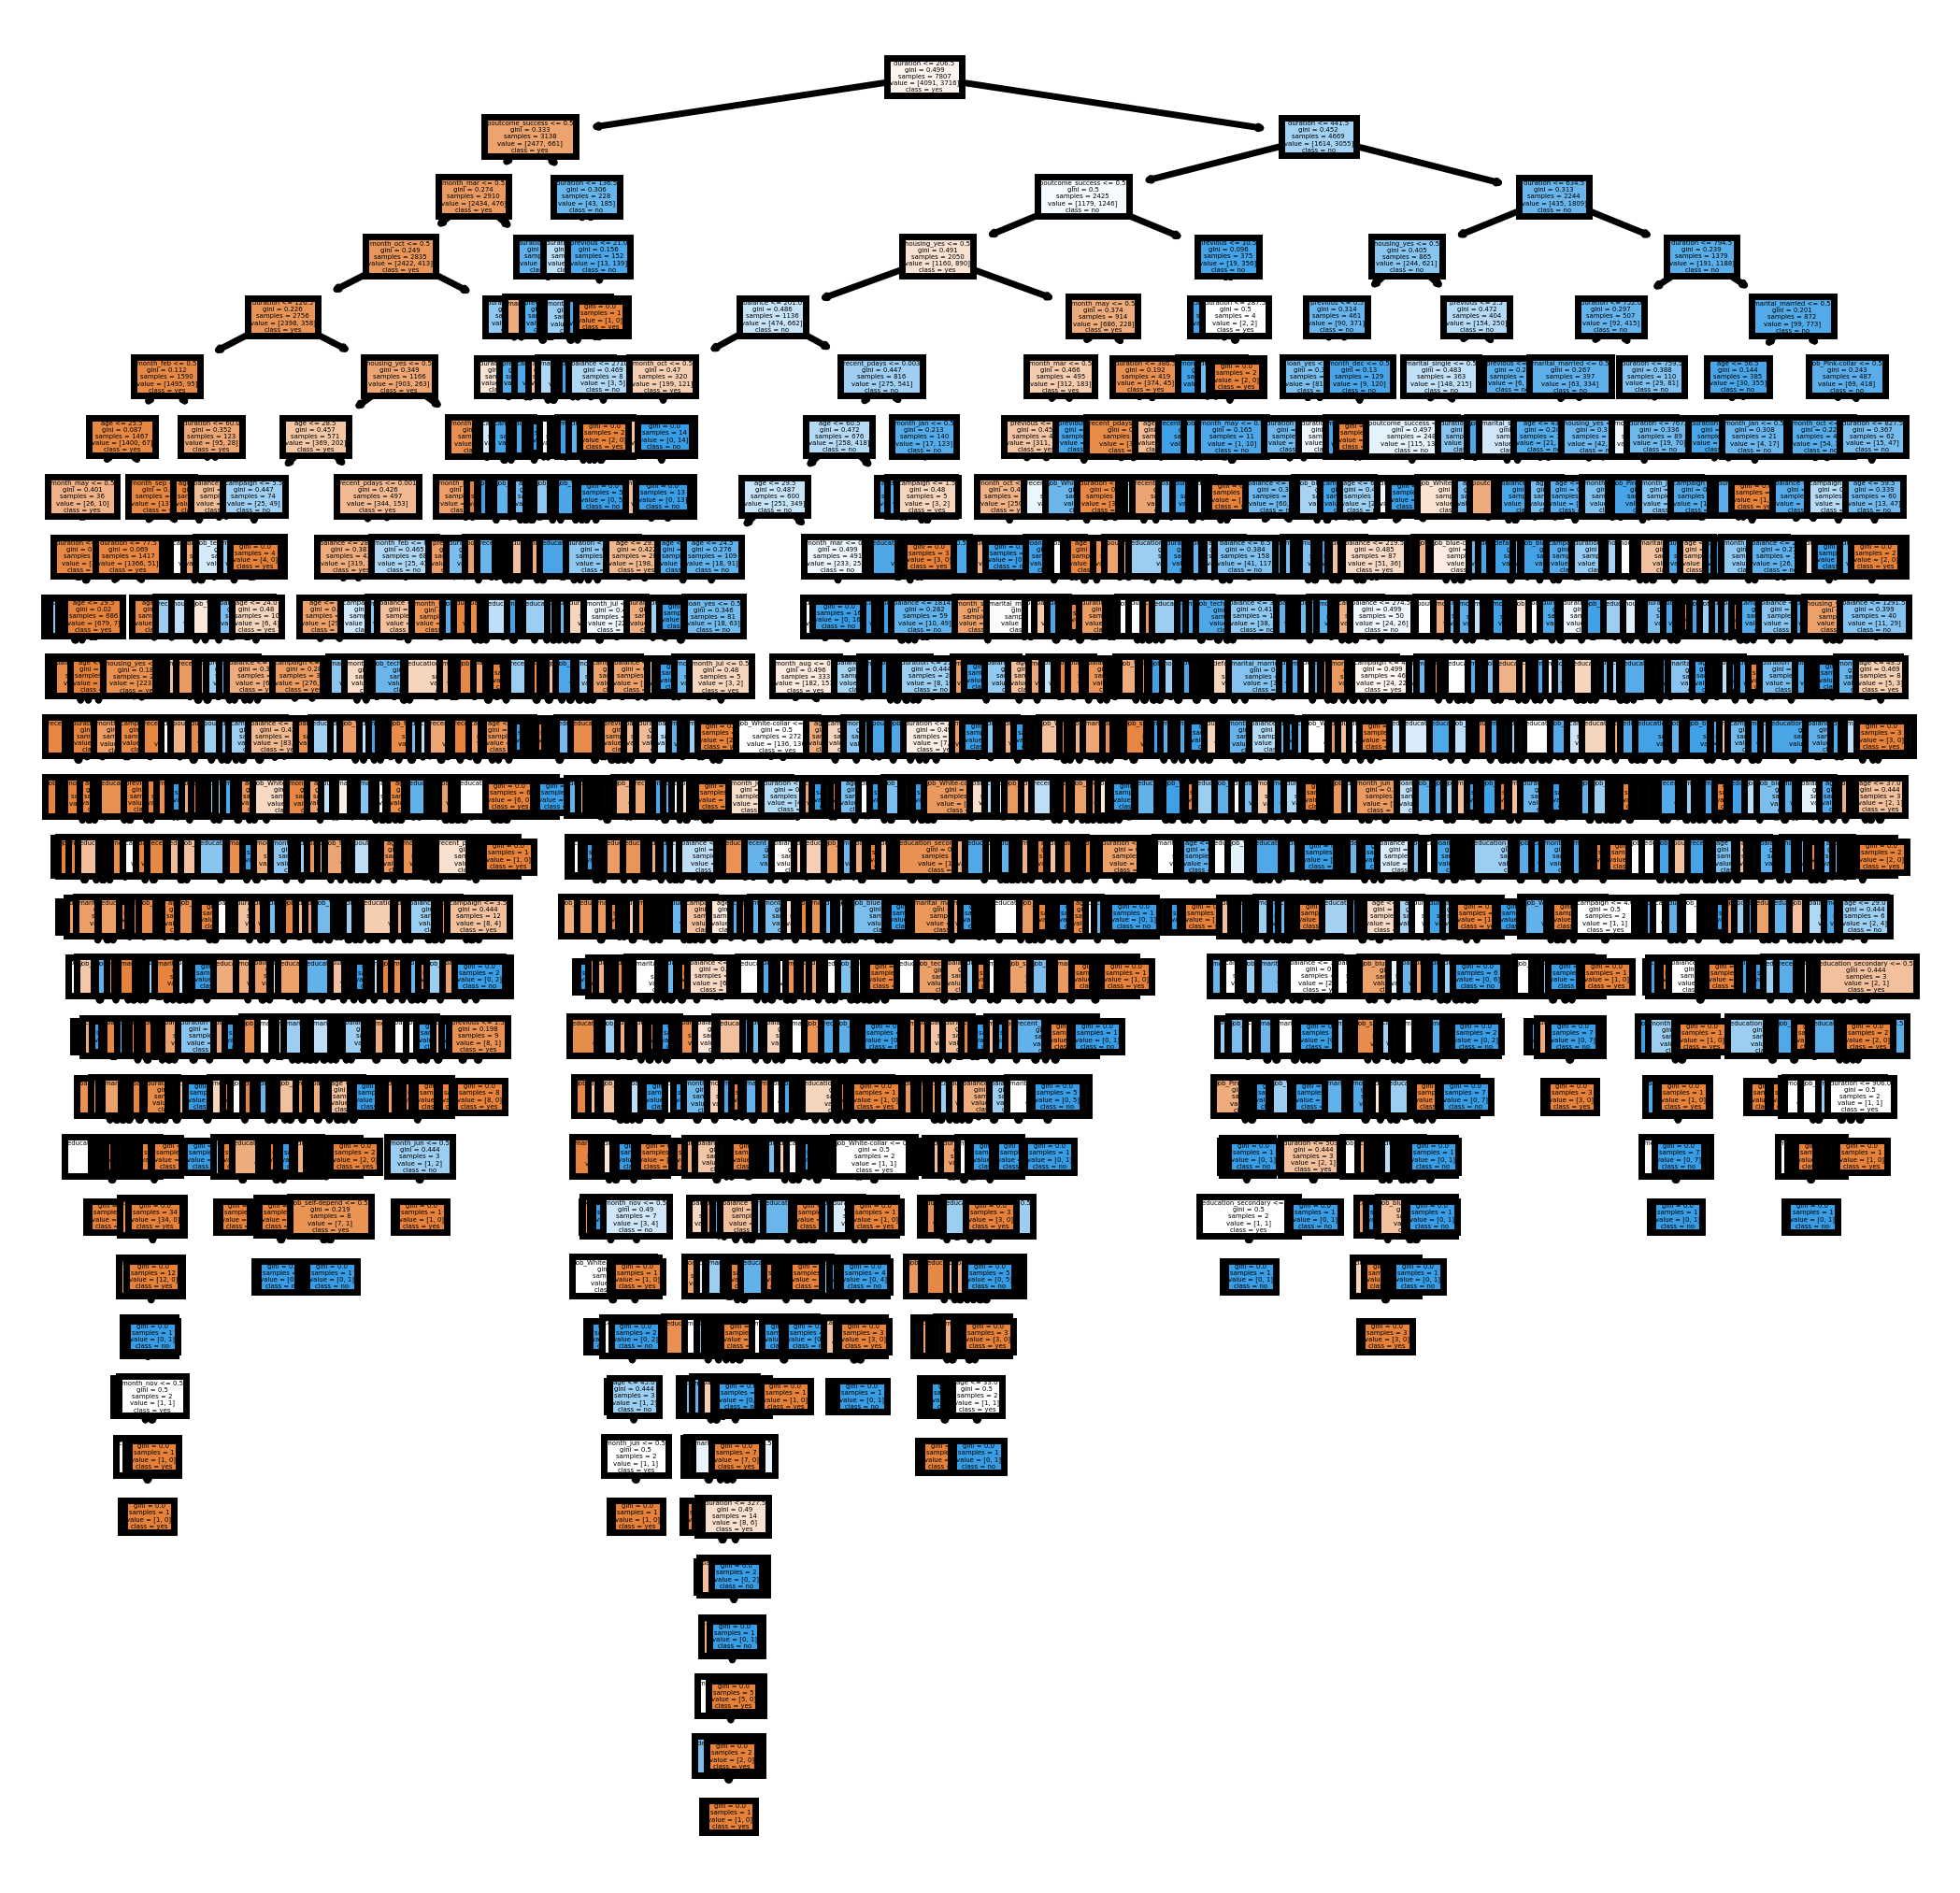

In [120]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt,feature_names = fn,
                  class_names=cn,
                  filled = True);

***
* Our model is overfitting as train results are far better than test
* To avoid overfitting : 
        make model simple ( control the parameters)
        Cross Validation 
***

In [139]:
dt1=DecisionTreeClassifier(max_depth=7)
dt1.fit(x_train, y_train)
print("Train Accuracy :", round(dt1.score(x_train, y_train),3))
print("Test Accuracy :", round(dt1.score(x_test, y_test),3))

Train Accuracy : 0.824
Test Accuracy : 0.799


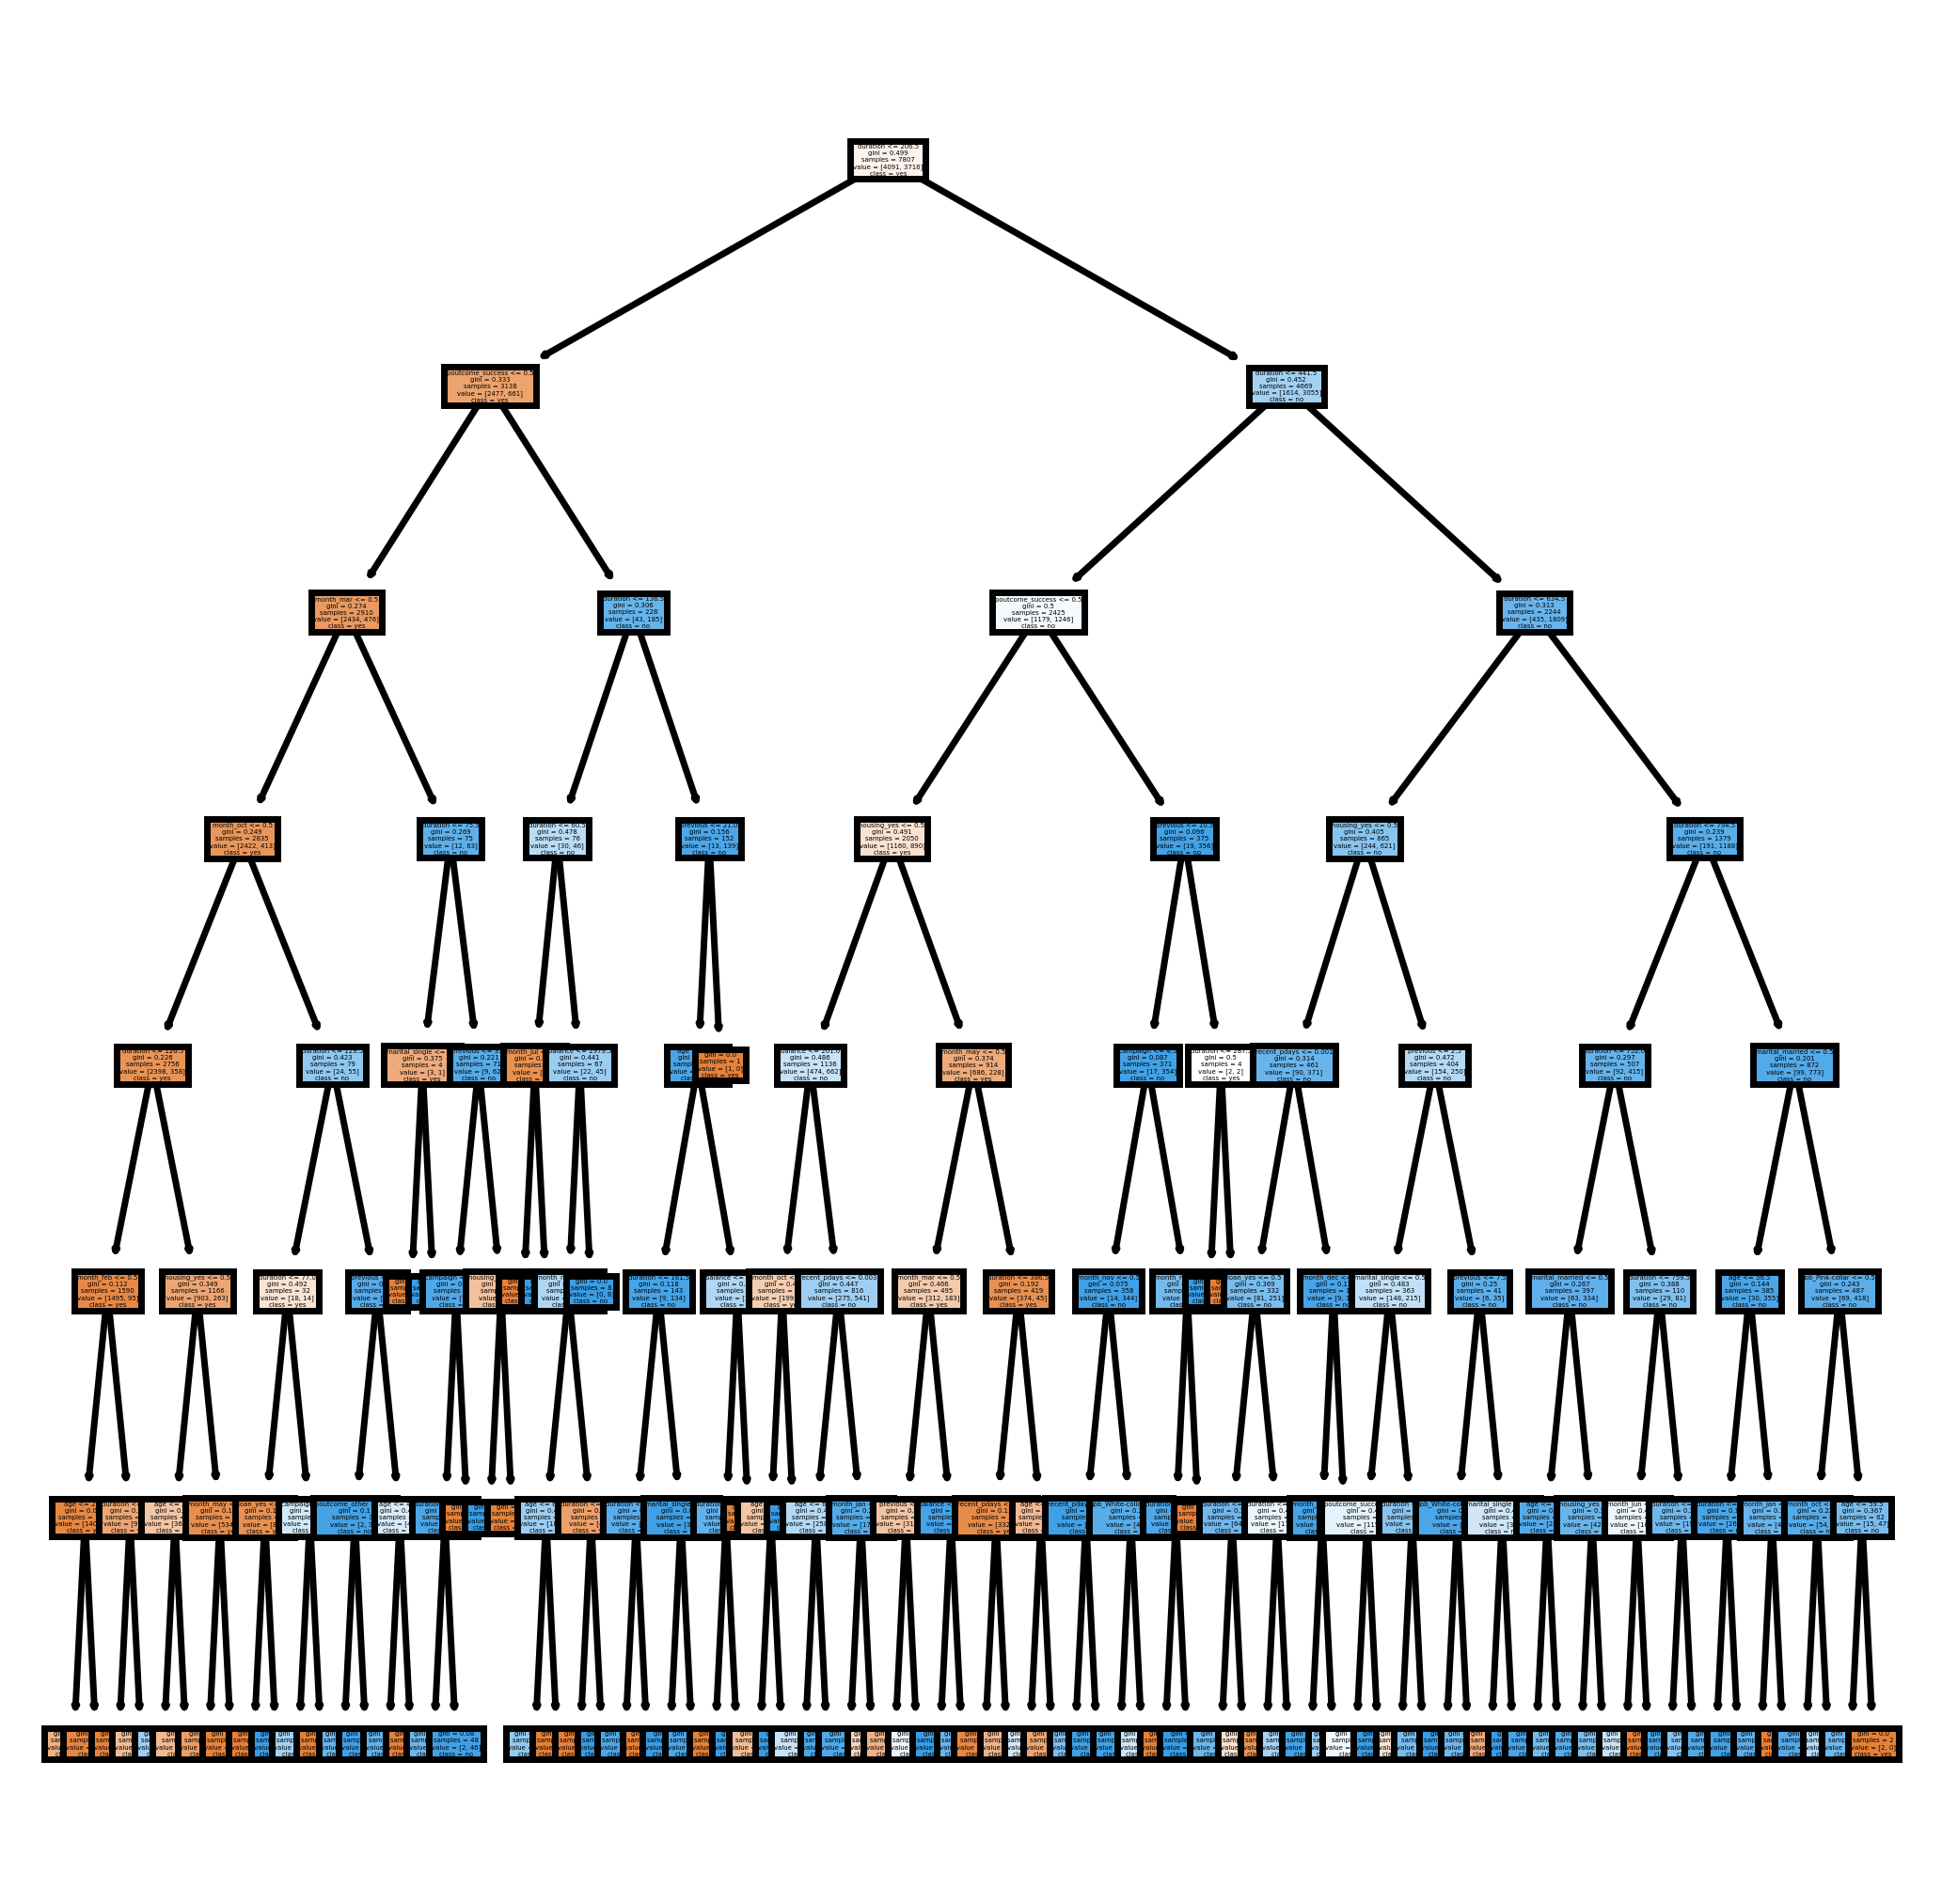

In [140]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

dt_plot=plot_tree(dt1,feature_names = fn,
                  class_names=cn,
                  filled = True);

In [142]:
dt2=DecisionTreeClassifier(min_samples_split=200)
dt2.fit(x_train, y_train)
print("Train Accuracy : "+str(round(dt2.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt2.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 83.2%
Test Accuracy :80.2%


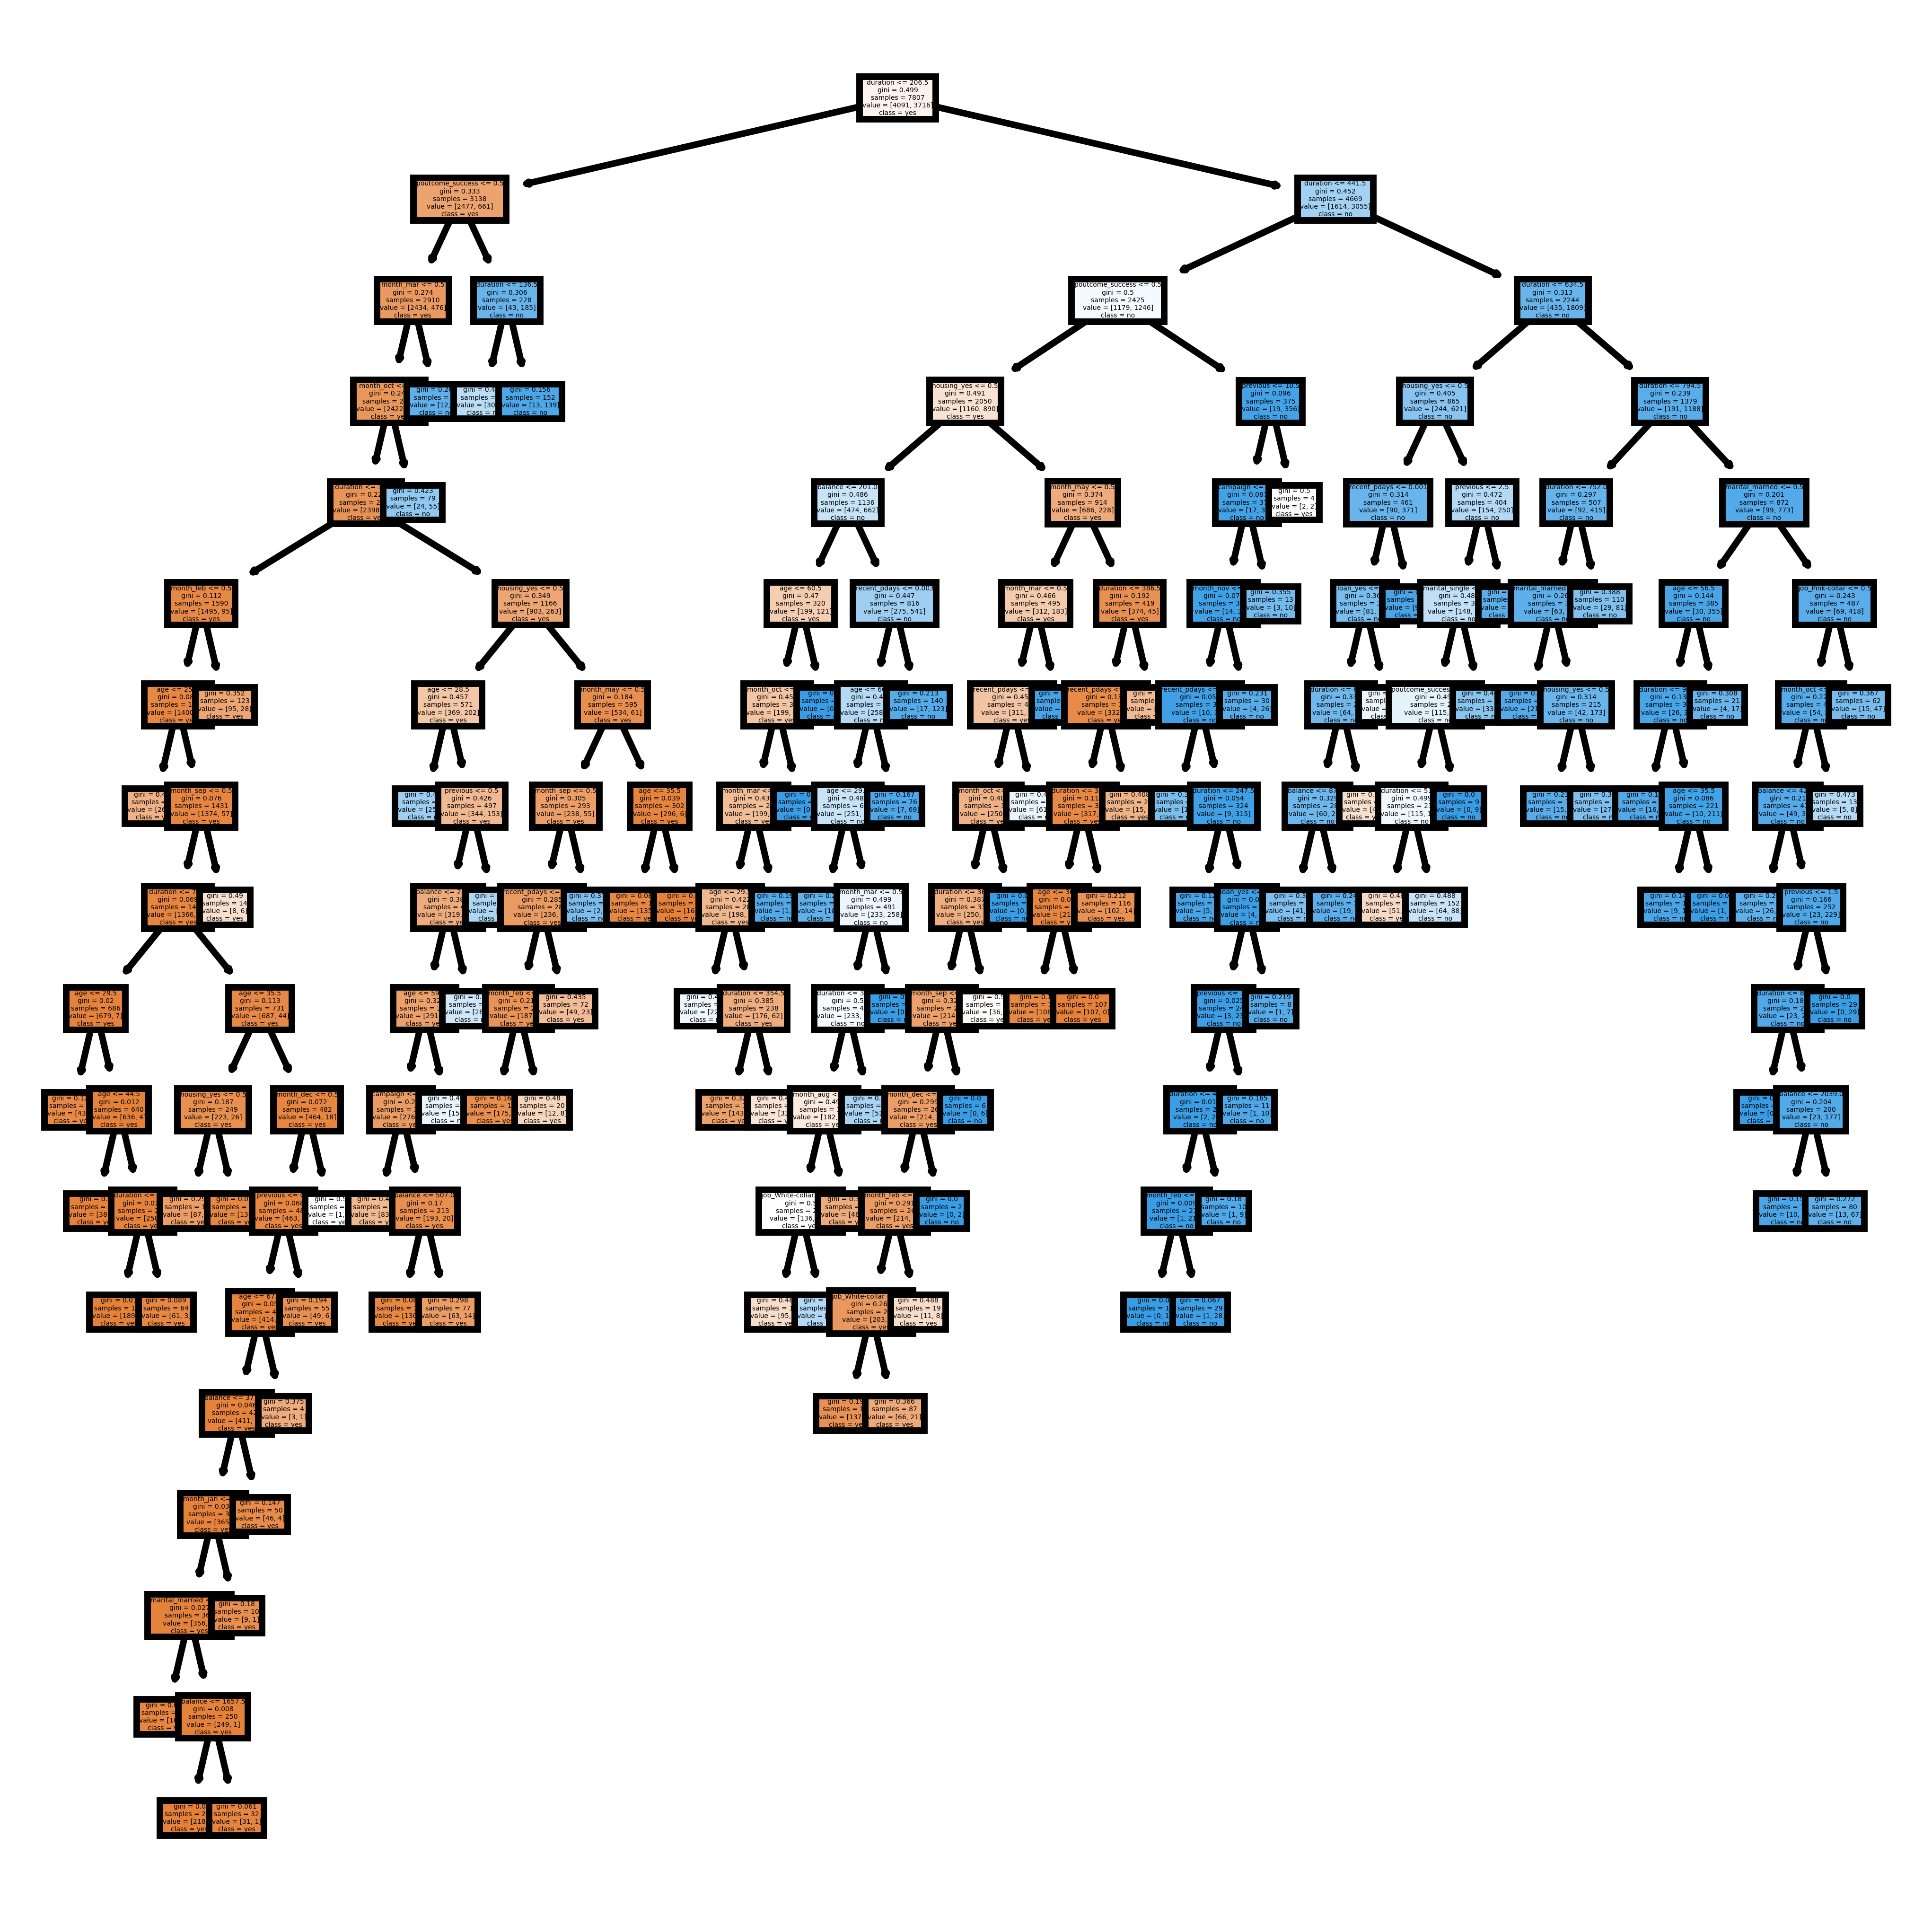

In [144]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=1000)

dt_plot=plot_tree(dt2,feature_names = fn,
                  class_names=cn,
                  filled = True);

In [108]:
dt1=DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 82.89999999999999%
Test Accuracy :81.10000000000001%


In [145]:
dt1=DecisionTreeClassifier(criterion="gini")
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 100.0%
Test Accuracy :75.5%


In [148]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train, y_train)

print("Train Accuracy : "+str(round(dt1.score(x_train, y_train),3)*100)+str('%'))
print("Test Accuracy :"+str(round(dt1.score(x_test, y_test),3)*100)+str("%"))

Train Accuracy : 100.0%
Test Accuracy :75.0%


### Grid Search : Parameter tuning

In [ ]:
criterion=["gini", "entropy"]
max_depth=[5,7,9,10,12,14,16,17,20]
min_samples_split=[10,15,20,50,100,200,250]
min_samples_leaf=[5,10,15,20,50,80,100]

In [151]:
2*9*7*7*10*1/60

147.0

In [ ]:
iter criterion  depth   split  leaf   Accuracy
0     gini       5        10    5       65%
1     gini        5       10    10      64%
2     gini       5        10    15      67%
3     gini       5        10    20      58%
4     gini       5        10    50      59%
5     gini       5        10    80     68%
5     gini       5        10    100    69%
5     gini       5        15    10    69%

In [153]:
from sklearn.model_selection import GridSearchCV

params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier(random_state=0)
gd_search=GridSearchCV(estimator=dtg,param_grid=params , cv=10, n_jobs=1)
gd_search.fit(x_train, y_train) 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]})

In [218]:
# n_jobs=-1 ( means usae all logical processor)
# n_jobs=1 (means use only one logical processor)
# n_jobs=2 (means use only 2 logical processor)
# n_jobs=3 (means use only 3 logical processor) 

In [154]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 20,
 'min_samples_split': 100}

In [155]:
gd_search.best_score_

0.8127307199842411

In [156]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=20, min_samples_split=100,
                       random_state=0)

In [226]:
# cv_res=pd.DataFrame(gd_search.cv_results_)
# cv_res.to_excel("cv.xlsx")

In [157]:
dt_f=DecisionTreeClassifier(criterion="gini",max_depth=11,
                            min_samples_leaf=20, 
                            min_samples_split=100)
dt_f.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=20, min_samples_split=100)

In [158]:
print("Train Accuracy : ", round(dt_f.score(x_train, y_train),3))
print("Test Accuracy :",round(dt_f.score(x_test, y_test),3))

Train Accuracy :  0.834
Test Accuracy : 0.803


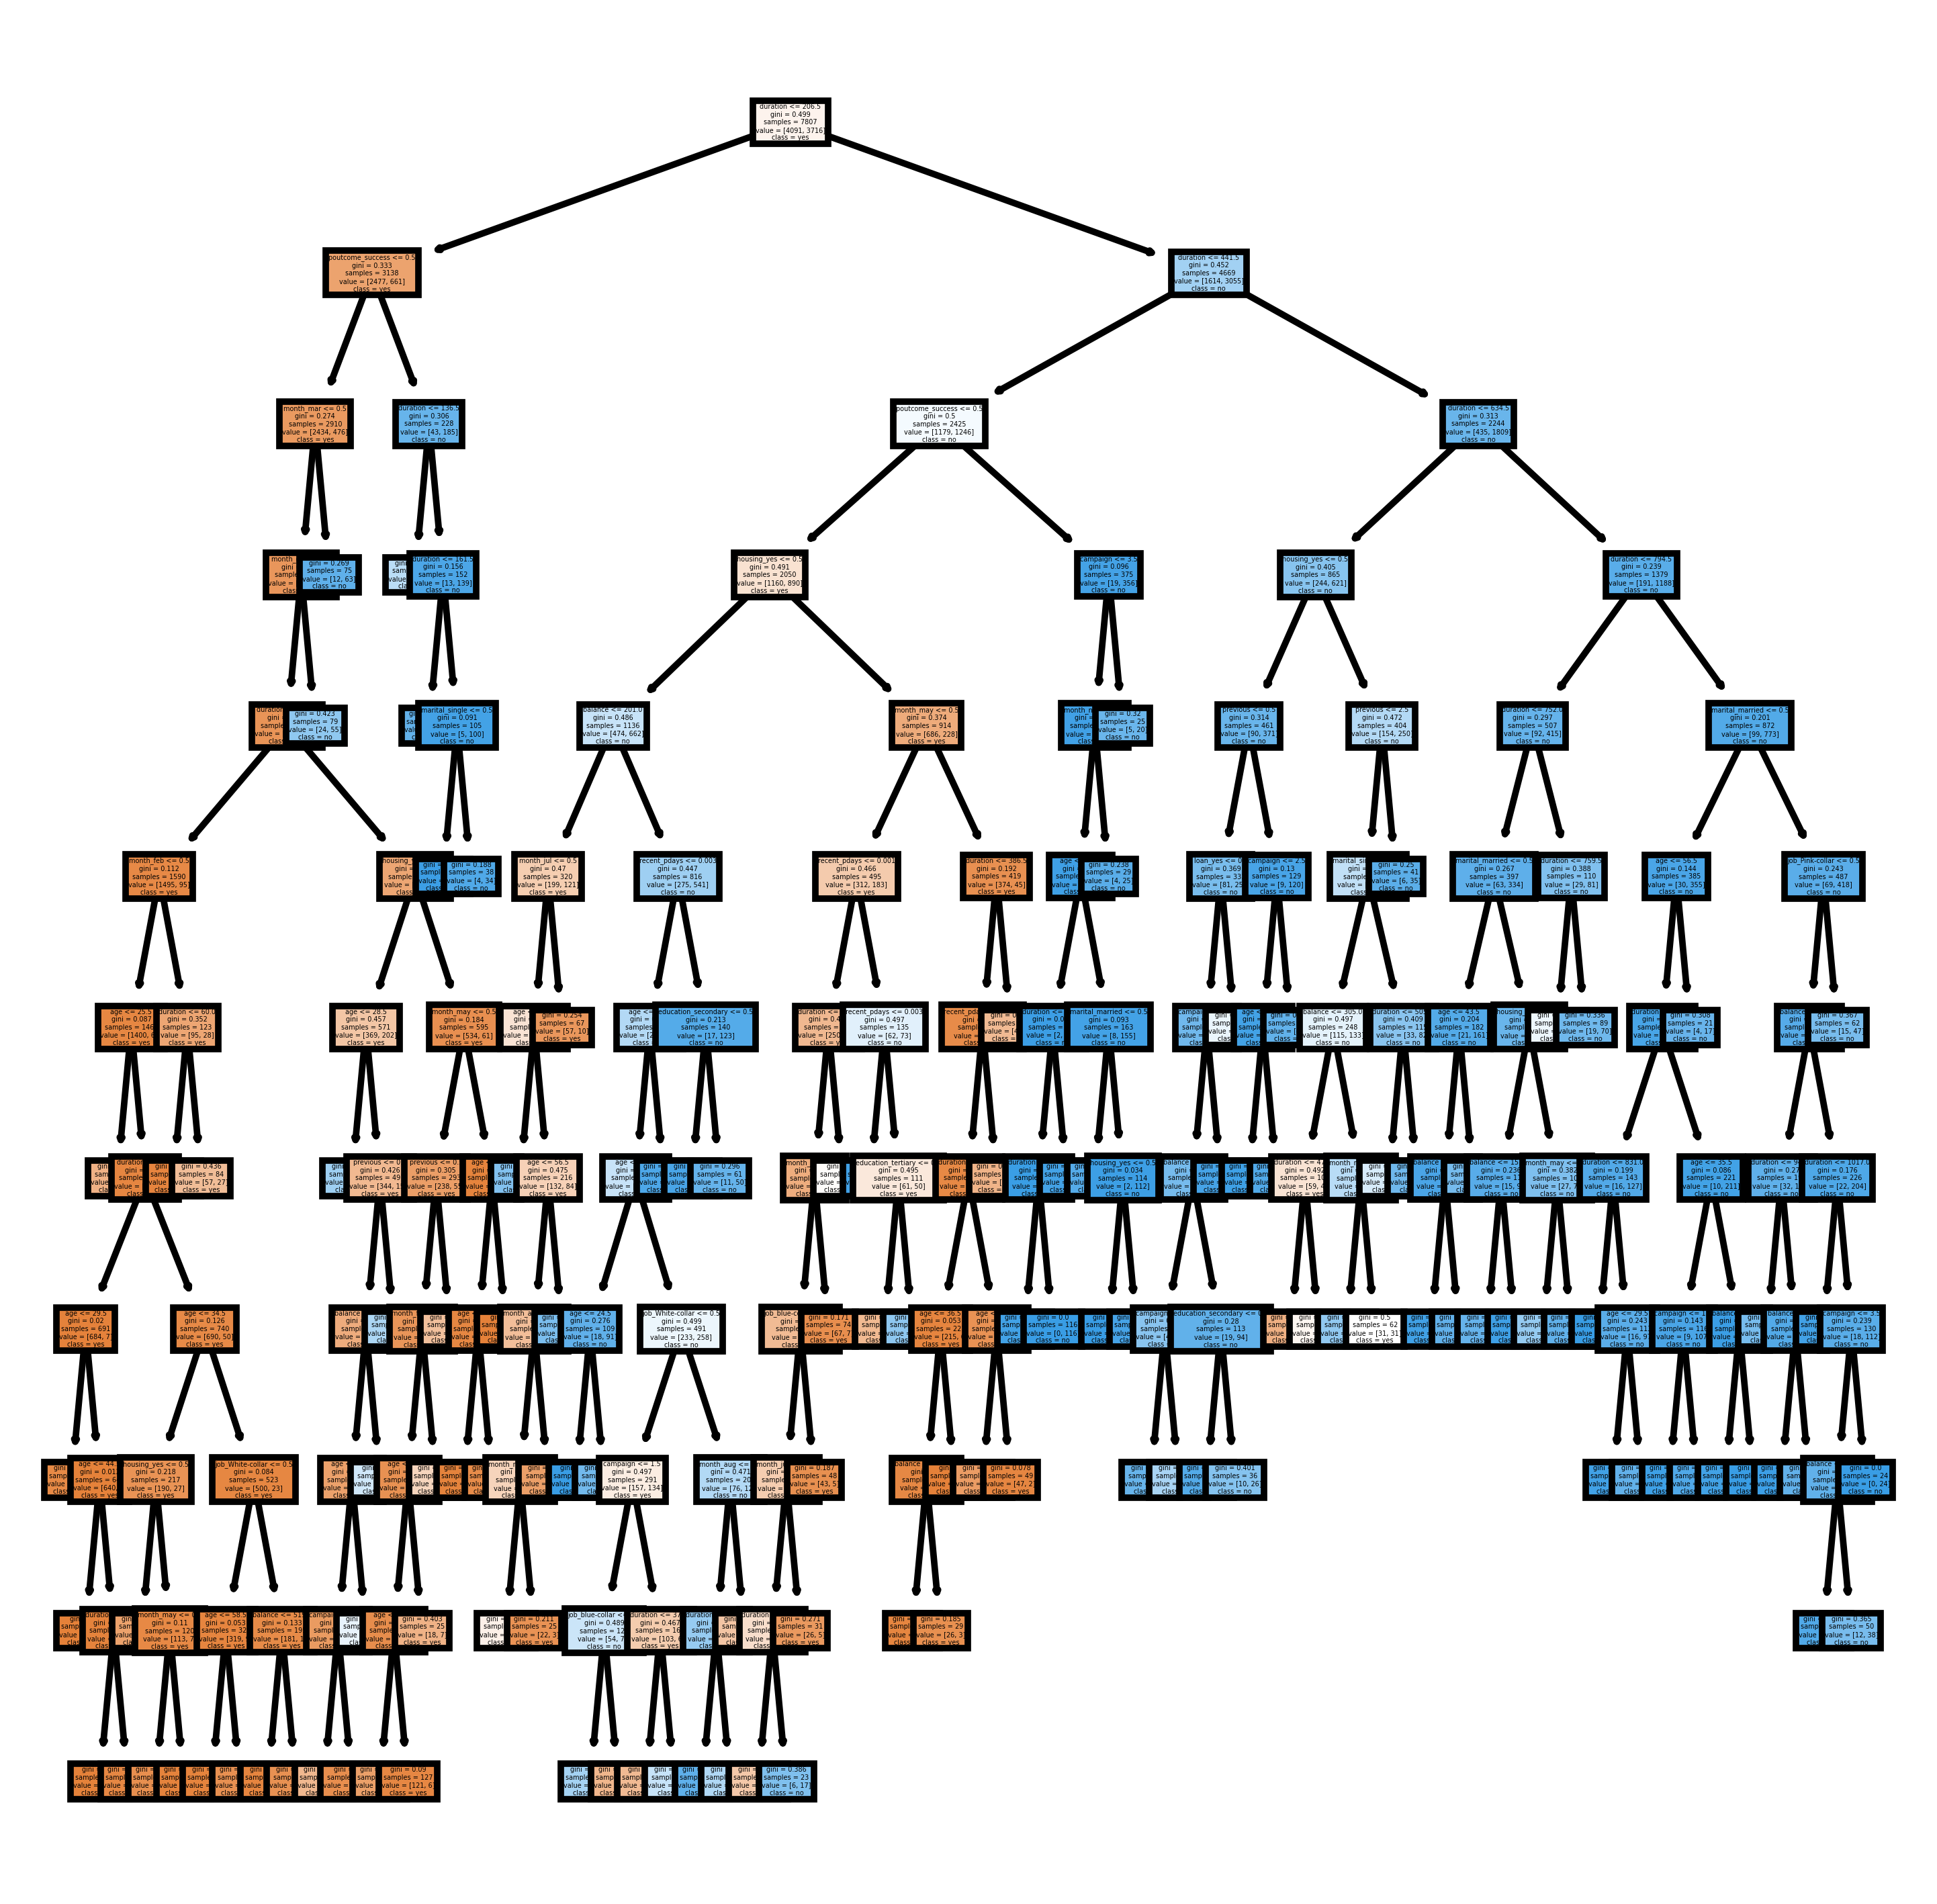

In [160]:
from sklearn.tree import plot_tree
fn=x_train.columns.to_list()
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=700)

dt_plot=plot_tree(dt_f,
           feature_names = fn, 
           class_names=cn,
           filled = True)

In [161]:
from sklearn.tree import export_text
rules=export_text(dt_f, feature_names=x_train.columns.to_list())
print(rules)

|--- duration <= 206.50
|   |--- poutcome_success <= 0.50
|   |   |--- month_mar <= 0.50
|   |   |   |--- month_oct <= 0.50
|   |   |   |   |--- duration <= 126.50
|   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |--- duration <= 77.50
|   |   |   |   |   |   |   |   |--- age <= 29.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  29.50
|   |   |   |   |   |   |   |   |   |--- age <= 44.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  44.50
|   |   |   |   |   |   |   |   |   |   |--- duration <= 64.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- duration >  64.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- duration >  77.50
|   |   |  

In [240]:
# duration <= 206.50 &poutcome_success <= 0.50 & month_mar <= 0.50 &duration <= 124.50 & duration <= 77.50 & month_feb <= 0.50 & age <= 29.50 
# duration <= 206.50 &poutcome_success <= 0.50 & month_mar <= 0.50 &duration <= 124.50 & duration <= 77.50 & month_feb <= 0.50 & age <= 29.50 

## Feature Importance

In [162]:
dt_f.feature_importances_ 

array([4.36316447e-02, 3.09143487e-02, 5.12019063e-01, 9.54915296e-03,
       1.52842775e-02, 1.87913547e-02, 6.92063092e-04, 3.15665925e-03,
       5.23623661e-03, 0.00000000e+00, 0.00000000e+00, 1.82367427e-03,
       2.57086799e-03, 9.78981359e-04, 3.77457996e-03, 0.00000000e+00,
       0.00000000e+00, 8.15556285e-02, 2.03885746e-03, 4.88335424e-03,
       0.00000000e+00, 5.11163859e-03, 0.00000000e+00, 6.87786514e-03,
       1.70174015e-03, 3.41406945e-02, 2.35442601e-02, 2.93922019e-04,
       2.38716877e-02, 0.00000000e+00, 0.00000000e+00, 1.67557448e-01])

In [167]:
feat_imp=pd.DataFrame({"Features":x_train.columns, "Importance":dt_f.feature_importances_}).sort_values(by=["Importance"], ascending=False)

In [168]:
feat_imp

Features  Importance
2              duration    0.512019
31     poutcome_success    0.167557
17          housing_yes    0.081556
0                   age    0.043632
25            month_mar    0.034141
1               balance    0.030914
28            month_oct    0.023872
26            month_may    0.023544
5          recent_pdays    0.018791
4              previous    0.015284
3              campaign    0.009549
23            month_jul    0.006878
8       job_blue-collar    0.005236
21            month_feb    0.005112
19            month_aug    0.004883
14   education_tertiary    0.003775
7      job_White-collar    0.003157
12       marital_single    0.002571
18             loan_yes    0.002039
11      marital_married    0.001824
24            month_jun    0.001702
13  education_secondary    0.000979
6       job_Pink-collar    0.000692
27            month_nov    0.000294
15    education_unknown    0.000000
20            month_dec    0.000000
22            month_jan    0.000000
10       job_technician    0.000000
9       job_self-depend    0.000000
29            month_sep    0.000000
30       poutcome_other    0.000000
16          default_yes    0.000000

<AxesSubplot:xlabel='Features', ylabel='Importance'>

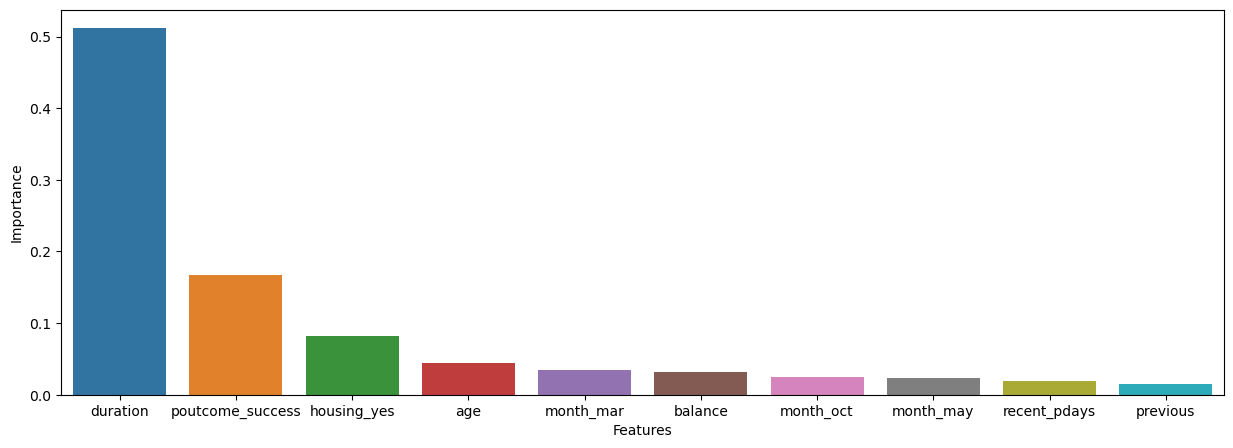

In [171]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10), x="Features", y="Importance")

In [172]:
feat_imp[feat_imp["Importance"]>=0.01]["Features"].unique()

array(['duration', 'poutcome_success', 'housing_yes', 'age', 'month_mar',
       'balance', 'month_oct', 'month_may', 'recent_pdays', 'previous'],
      dtype=object)

In [174]:
x_train1=x_train[['duration', 'poutcome_success', 'housing_yes', 'age', 'month_mar',
       'balance', 'month_oct', 'month_may', 'recent_pdays', 'previous']]

x_test1=x_test[['duration', 'poutcome_success', 'housing_yes', 'age', 'month_mar',
       'balance', 'month_oct', 'month_may', 'recent_pdays', 'previous']]

In [175]:
dt_f=DecisionTreeClassifier(criterion="gini",max_depth=11,
                            min_samples_leaf=5, 
                            min_samples_split=200)
dt_f.fit(x_train1, y_train)
print("Train Accuracy : ", round(dt_f.score(x_train1, y_train),3))
print("Test Accuracy :",round(dt_f.score(x_test1, y_test),3))

Train Accuracy :  0.827
Test Accuracy : 0.797


In [176]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [178]:
pd.DataFrame(dt_f.predict_proba(x_train1), columns=["Porb_0", "Prob_1"])

Porb_0    Prob_1
0     0.902439  0.097561
1     0.563694  0.436306
2     0.000000  1.000000
3     0.160000  0.840000
4     0.394737  0.605263
...        ...       ...
7802  0.235294  0.764706
7803  0.563694  0.436306
7804  0.563694  0.436306
7805  0.771930  0.228070
7806  0.263158  0.736842

[7807 rows x 2 columns]

In [179]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]  #Prob of 1 
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [185]:
def classification_eva(act, pred, probs):
    ac1=metrics.accuracy_score(act, pred)
    rc1=metrics.recall_score(act, pred)
    pc1=metrics.precision_score(act, pred)
    f1=metrics.f1_score(act, pred)
    auc1=metrics.roc_auc_score(act, pred)
    result={"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
    fpr, tpr, threshold=metrics.roc_curve(act,probs )
    plt.plot([0,1],[0,1],'k--', label="AUC: "+str(auc1))
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.legend()
    plt.show()
    return result

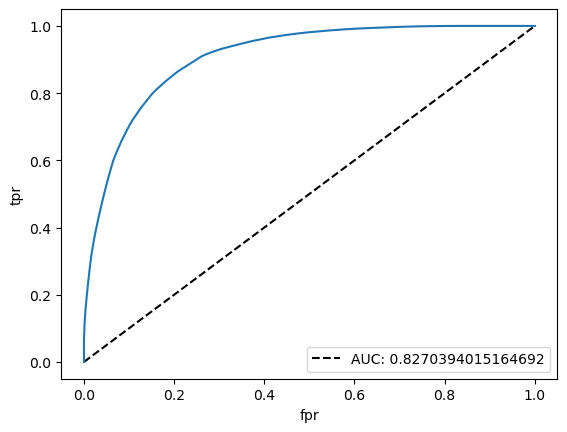

{'Accuracy': 0.8266939925707698,
 'Recall': 0.8342303552206674,
 'Precision': 0.8079228563982278,
 'F1 score': 0.8208658811068449,
 'AUC': 0.8270394015164692}

In [186]:
classification_eva(y_train, pred_train, probs=prob_train_1)

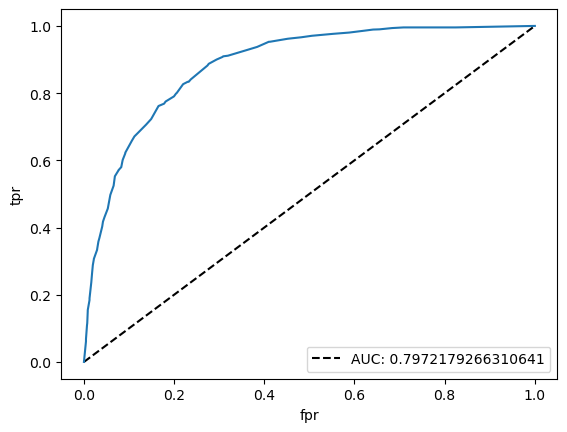

{'Accuracy': 0.7971317597848819,
 'Recall': 0.798597833014659,
 'Precision': 0.7753712871287128,
 'F1 score': 0.7868131868131868,
 'AUC': 0.7972179266310641}

In [187]:
classification_eva(y_test, pred_test, probs=prob_test_1)